<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-6/Act_3_4_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.4: Extraccion de Características (Airbnb - México)



In [ ]:
%pip install funpymodeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [ ]:
pd.options.display.max_columns = None

In [ ]:
pd.options.display.max_rows = None

In [ ]:
data = pd.read_csv('Mexico_listings_clean.csv',encoding='utf-8')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

last_scraped       source                                          name  \
0   2024-06-28  city scrape  City SkyLine View from 1 Bedroom Apt in CDMX   
1   2024-06-27  city scrape                                   Villa Dante   
2   2024-06-28  city scrape                             CONDESA HAUS  B&B   
3   2024-06-28  city scrape            15 blocks from Paseo de la Reforma   
4   2024-06-28  city scrape             2 bedroom apt. deco bldg, Condesa   

                                         description host_name  host_since  \
0  The LOCATION is undoubtedly THE BIG advantage ...     Marco  2013-01-21   
1  Dentro de Villa un estudio de arte con futon, ...      Dici  2010-06-28   
2  A new concept of hosting in mexico through a b...  Fernando  2010-08-09   
3                           No description available   Martina  2013-01-09   
4  Comfortably furnished, sunny, 2 bedroom apt., ...  Nicholas  2011-01-04   

         host_location  host_response_time host_is_superhost  \
0  Mexico City, Mexico      within an hour                 t   
1  Mexico City, Mexico  a few days or more                 f   
2  Mexico City, Mexico      within an hour                 t   
3  Mexico City, Mexico      within an hour                 t   
4  Mexico City, Mexico        within a day                 t   

                 host_verifications host_has_profile_pic  \
0                ['email', 'phone']                    t   
1  ['email', 'phone', 'work_email']                    t   
2  ['email', 'phone', 'work_email']                    t   
3                ['email', 'phone']                    t   
4                ['email', 'phone']                    t   

  host_identity_verified neighbourhood_cleansed              property_type  \
0                      t             Cuauhtémoc         Entire rental unit   
1                      t  Cuajimalpa de Morelos               Entire villa   
2                      t             Cuauhtémoc                Entire home   
3                      t         Miguel Hidalgo  Entire serviced apartment   
4                      t             Cuauhtémoc         Entire rental unit   

         room_type                                          amenities  \
0  Entire home/apt  ["40 inch HDTV with Amazon Prime Video, Netfli...   
1  Entire home/apt  ["Hot water", "Washer", "Bed linens", "Wifi", ...   
2  Entire home/apt  ["Wifi", "Coffee maker: Nespresso", "Host gree...   
3  Entire home/apt  ["Wifi", "Host greets you", "Coffee maker", "S...   
4  Entire home/apt  ["Wifi", "Coffee maker", "Sound system", "Clot...   

  has_availability calendar_last_scraped first_review last_review  \
0                t            2024-06-28   2013-03-30  2024-04-17   
1                t            2024-06-27   2030-12-31  2030-12-31   
2                t            2024-06-28   2011-11-09  2023-03-26   
3                t            2024-06-28   2013-05-16  2024-05-21   
4                t            2024-06-28   2011-11-17  2024-05-05   

  instant_bookable  accommodates  bathrooms  bedrooms  beds  availability_30  \
0                f          2.00       1.00      1.00  2.00                0   
1                f          2.00       1.00      1.00  1.00               28   
2                f          2.95       1.32      1.45  1.55               29   
3                t          4.00       1.00      2.00  3.00                3   
4                f          4.00       1.00      2.00  2.00               26   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                     0.0                  4.95                    4.93   
1                     0.0                  4.76                    4.80   
2                     0.0                  4.58                    4.56   
3                     0.0                  4.75                    4.83   
4                     0.0                  4.90                    4.81   

   review_scores_cleanliness  review_scores_checkin  \
0             

In [ ]:
data.shape

(26536, 60)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26536 non-null  object 
 1   source                                        26536 non-null  object 
 2   name                                          26536 non-null  object 
 3   description                                   26536 non-null  object 
 4   host_name                                     26536 non-null  object 
 5   host_since                                    26536 non-null  object 
 6   host_location                                 26536 non-null  object 
 7   host_response_time                            26536 non-null  object 
 8   host_is_superhost                             26536 non-null  object 
 9   host_verifications                            26536 non-null 

In [ ]:
valores_nulos = data.isnull().sum()
valores_nulos

last_scraped                                    0
source                                          0
name                                            0
description                                     0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_is_superhost                               0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
amenities                                       0
has_availability                                0
calendar_last_scraped                           0
first_review                                    0
last_review                                     0
instant_bookable                                0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
availability_30                                 0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
host_response_rate                              0
host_acceptance_rate                            0
latitude                                        0
longitude                                       0
minimum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_nights_avg_ntm                          0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews_ltm                           0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
host_listings_count                             0
host_total_listings_count                       0
price                                           0
maximum_nights                                  0
number_of_reviews                               0
host_id                                         0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
maximum_nights_avg_ntm                          0
dtype: int64

## Variables Categóricas


In [ ]:
table1 = freq_tbl(data['last_scraped'])
table1

last_scraped  frequency  percentage  cumulative_perc
0   2024-06-28      18404    0.693548         0.693548
1   2024-06-27       8132    0.306452         1.000000

In [ ]:
table1_2 = table1.drop(['percentage','cumulative_perc'],axis=1)
table1_2

last_scraped  frequency
0   2024-06-28      18404
1   2024-06-27       8132

In [ ]:
filtro1 = table1_2[table1_2['frequency']>1]
filtro1

last_scraped  frequency
0   2024-06-28      18404
1   2024-06-27       8132

In [ ]:
filtro_index1 = filtro1.set_index('last_scraped')
filtro_index1

frequency
last_scraped           
2024-06-28        18404
2024-06-27         8132

<Axes: ylabel='frequency'>

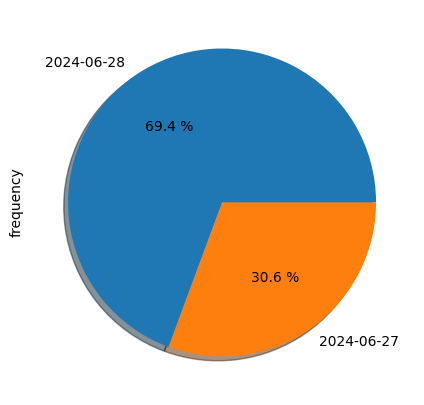

In [ ]:
filtro_index1['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table2 = freq_tbl(data['source'])
table2

source  frequency  percentage  cumulative_perc
0      city scrape      23409     0.88216          0.88216
1  previous scrape       3127     0.11784          1.00000

In [ ]:
table2_2 = table2.drop(['percentage','cumulative_perc'],axis=1)
table2_2

source  frequency
0      city scrape      23409
1  previous scrape       3127

In [ ]:
filtro2 = table2_2[table2_2['frequency']>1]
filtro2

source  frequency
0      city scrape      23409
1  previous scrape       3127

In [ ]:
filtro_index2 = filtro2.set_index('source')
filtro_index2

frequency
source                    
city scrape          23409
previous scrape       3127

<Axes: ylabel='frequency'>

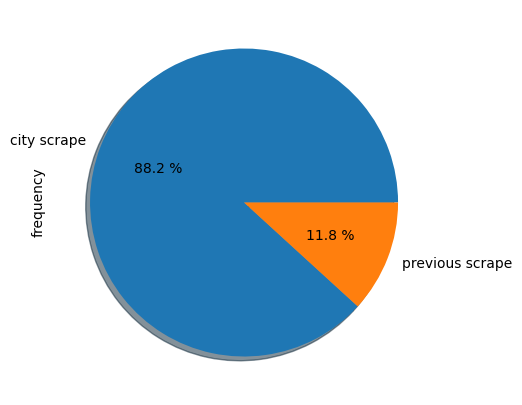

In [ ]:
filtro_index2['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table3 = freq_tbl(data['host_name'])

In [ ]:
table3_2 = table3.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro3 = table3_2[table3_2['frequency']>9]
filtro3

host_name  frequency
0                            Alejandra        329
1                              Virtual        318
2                                Mr. W        303
3                                 Luis        288
4                            Alejandro        272
5                           Blueground        246
6                               Carlos        245
7                                Jorge        226
8                                 Juan        218
9                              Eduardo        197
10                             Rodrigo        196
11                             Ricardo        175
12                              Andrea        163
13                              Daniel        161
14                           Francisco        154
15                            Fernando        153
16                               Kukun        147
17                               Maria        146
18                                 Ana        146
19                                Clau        146
20                           Capitalia        141
21                               Pablo        133
22                               David        129
23                             Alberto        129
24                               Diana        124
25                              Javier        123
26                             Gerardo        122
27                              Adrian        121
28                               Marco        119
29                            Veronica        119
30                               Karla        118
31                              Victor        118
32                            Gabriela        118
33                               Laura        114
34                               Diego        110
35                             Enrique        109
36                             Mariana        109
37                                HOMi        108
38                             Antonio        106
39                              Hector        100
40                               Mario         96
41                             Roberto         95
42                             Claudia         94
43                            Patricia         92
44                         Juan Carlos         92
45                               Arely         91
46                              Arturo         90
47                      Host Me Tender         89
48                              Manuel         89
49                                Jose         88
50                              Miguel         87
51                              Rafael         85
52                                Omar         85
53                             Gabriel         81
54                              Sergio         80
55                               Erick         80
56                             Esteban         79
57                              Andres         78
58                             Daniela         78
59                             Adriana         76
60                                Uliv         74
61                              Kasava         73
62                        Dave And Nat         71
63                            Mauricio         69
64                               Oscar         69
65                             Paulina         67
66                               Paola         62
67                               Chris         62
68                          Montserrat         61
69                             Armando         60
70                           Guillermo         60
71                                Ivan         60
72                              Isabel         60
73                              Suites         59
74                              Lorena         58
75                             Jessica         57
76                             Fabiola         56
77                            Cristina         54
78                             Gustavo         54
79                           

In [ ]:
filtro_index3 = filtro3.set_index('host_name')
filtro_index3

frequency
host_name                                   
Alejandra                                329
Virtual                                  318
Mr. W                                    303
Luis                                     288
Alejandro                                272
Blueground                               246
Carlos                                   245
Jorge                                    226
Juan                                     218
Eduardo                                  197
Rodrigo                                  196
Ricardo                                  175
Andrea                                   163
Daniel                                   161
Francisco                                154
Fernando                                 153
Kukun                                    147
Maria                                    146
Ana                                      146
Clau                                     146
Capitalia                                141
Pablo                                    133
David                                    129
Alberto                                  129
Diana                                    124
Javier                                   123
Gerardo                                  122
Adrian                                   121
Marco                                    119
Veronica                                 119
Karla                                    118
Victor                                   118
Gabriela                                 118
Laura                                    114
Diego                                    110
Enrique                                  109
Mariana                                  109
HOMi                                     108
Antonio                                  106
Hector                                   100
Mario                                     96
Roberto                                   95
Claudia                                   94
Patricia                                  92
Juan Carlos                               92
Arely                                     91
Arturo                                    90
Host Me Tender                            89
Manuel                                    89
Jose                                      88
Miguel                                    87
Rafael                                    85
Omar                                      85
Gabriel                                   81
Sergio                                    80
Erick                                     80
Esteban                                   79
Andres                                    78
Daniela                                   78
Adriana                                   76
Uliv                                      74
Kasava                                    73
Dave And Nat                              71
Mauricio                                  69
Oscar                                     69
Paulina                                   67
Paola                                     62
Chris                                     62
Montserrat                                61
Armando                                   60
Guillermo                                 60
Ivan                                      60
Isabel                                    60
Suites                                    59
Lorena                                    58
Jessica                                   57
Fabiola                                   56
Cristina                                  54
Gustavo                                   54
Martha                                    54
Jaime                                     53
Paul                                      53
Salvador                                  53
Sandra                                    53
Víctor                                    53
Carmen                                    52
Erika                                     52
Raul                          

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

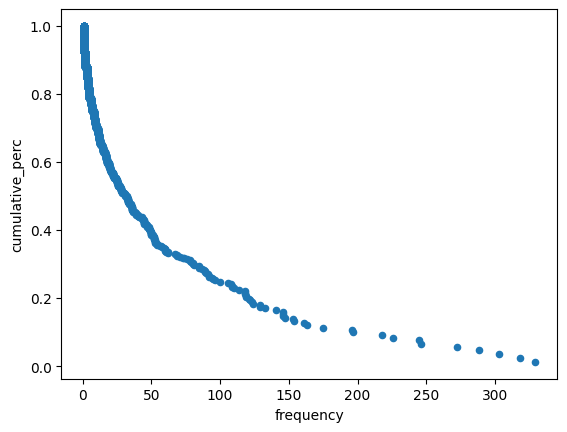

In [ ]:
table3.plot('frequency','cumulative_perc',kind='scatter')

In [ ]:
table4 = freq_tbl(data['host_since'])

In [ ]:
table4_2 = table4.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro4 = table4_2[table4_2['frequency']>9]
filtro4

host_since  frequency
0    2013-12-22        267
1    2023-01-30        255
2    2023-09-28        209
3    2016-04-27        142
4    2020-02-02        134
5    2018-08-04        126
6    2019-02-26        114
7    2016-08-22        113
8    2014-11-07        103
9    2019-10-15        100
10   2015-12-01         98
11   2023-01-26         92
12   2015-02-09         78
13   2019-07-15         78
14   2016-09-13         63
15   2023-01-24         63
16   2017-09-14         63
17   2021-05-27         61
18   2014-05-11         56
19   2020-07-29         54
20   2016-03-01         52
21   2018-11-22         51
22   2015-01-02         50
23   2022-07-23         49
24   2019-08-12         49
25   2015-08-03         48
26   2023-02-27         47
27   2015-08-27         47
28   2012-10-19         46
29   2016-04-08         46
30   2022-03-01         45
31   2017-04-23         45
32   2014-11-05         45
33   2020-06-02         45
34   2015-02-16         45
35   2015-06-07         44
36   2023-05-16         43
37   2015-06-18         42
38   2012-05-03         42
39   2023-02-15         42
40   2016-11-23         41
41   2016-04-16         40
42   2015-08-19         40
43   2022-02-28         40
44   2021-06-22         39
45   2016-09-07         39
46   2012-12-20         38
47   2022-03-24         38
48   2019-05-14         38
49   2017-03-22         38
50   2023-08-21         38
51   2019-07-22         37
52   2020-08-04         37
53   2022-09-02         37
54   2014-05-07         37
55   2018-04-18         36
56   2013-04-03         35
57   2015-05-25         35
58   2019-05-01         34
59   2016-03-31         34
60   2016-05-23         33
61   2017-02-02         33
62   2017-06-18         33
63   2016-09-21         32
64   2015-05-23         32
65   2013-02-18         32
66   2019-07-01         32
67   2017-04-16         32
68   2017-01-30         32
69   2021-09-28         31
70   2019-05-27         31
71   2017-05-15         31
72   2016-04-10         31
73   2022-10-31         31
74   2012-12-09         31
75   2018-08-03         30
76   2017-06-26         30
77   2022-04-14         30
78   2023-03-09         30
79   2014-02-13         29
80   2013-07-21         29
81   2015-12-21         28
82   2019-10-10         28
83   2020-02-11         28
84   2021-08-16         28
85   2015-02-12         28
86   2016-06-25         28
87   2015-03-24         27
88   2016-10-04         27
89   2017-10-27         27
90   2024-06-21         27
91   2023-06-01         27
92   2019-05-06         27
93   2015-12-23         27
94   2016-10-27         27
95   2015-06-09         27
96   2020-07-01         27
97   2015-11-23         27
98   2019-10-30         26
99   2013-05-25         26
100  2023-02-06         26
101  2016-04-05         26
102  2019-12-10         26
103  2013-09-17         26
104  2022-03-29         26
105  2016-03-02         26
106  2016-02-16         26
107  2023-04-16         25
108  2020-08-06         25
109  2023-05-04         25
110  2024-03-19         25
111  2015-11-10         25
112  2016-10-03         25
113  2015-05-05         25
114  2023-08-01         25
115  2018-02-05         25
116  2022-04-25         25
117  2020-12-12         25
118  2016-12-05         25
119  2013-10-21         25
120  2022-01-27         24
121  2016-11-24         24
122  2019-08-13         24
123  2020-06-16         24
124  2020-08-02         24
125  2020-11-12         24
126  2022-07-14         24
127  2018-03-31         23
128  2017-12-29         23
129  2015-08-25         23
130  2015-12-20         23
131  2021-03-10         23
132  2017-07-24         23
133  2017-01-10         23
134  2022-09-09         23
135  2022-08-29         23
136  2017-04-02         23
137  2014-10-27         23
138  2023-11-15         23
139  2022-09-23         22
140  2023-07-07         22
141  2016-11-08         22
142  2016-08-09         22
143  2022-06-02         22
144  2022-05-13         22
145  2016-01-13         22
146  2018-02-22         22
147  2021

In [ ]:
filtro_index4 = filtro4.set_index('host_since')
filtro_index4

frequency
host_since           
2013-12-22        267
2023-01-30        255
2023-09-28        209
2016-04-27        142
2020-02-02        134
2018-08-04        126
2019-02-26        114
2016-08-22        113
2014-11-07        103
2019-10-15        100
2015-12-01         98
2023-01-26         92
2015-02-09         78
2019-07-15         78
2016-09-13         63
2023-01-24         63
2017-09-14         63
2021-05-27         61
2014-05-11         56
2020-07-29         54
2016-03-01         52
2018-11-22         51
2015-01-02         50
2022-07-23         49
2019-08-12         49
2015-08-03         48
2023-02-27         47
2015-08-27         47
2012-10-19         46
2016-04-08         46
2022-03-01         45
2017-04-23         45
2014-11-05         45
2020-06-02         45
2015-02-16         45
2015-06-07         44
2023-05-16         43
2015-06-18         42
2012-05-03         42
2023-02-15         42
2016-11-23         41
2016-04-16         40
2015-08-19         40
2022-02-28         40
2021-06-22         39
2016-09-07         39
2012-12-20         38
2022-03-24         38
2019-05-14         38
2017-03-22         38
2023-08-21         38
2019-07-22         37
2020-08-04         37
2022-09-02         37
2014-05-07         37
2018-04-18         36
2013-04-03         35
2015-05-25         35
2019-05-01         34
2016-03-31         34
2016-05-23         33
2017-02-02         33
2017-06-18         33
2016-09-21         32
2015-05-23         32
2013-02-18         32
2019-07-01         32
2017-04-16         32
2017-01-30         32
2021-09-28         31
2019-05-27         31
2017-05-15         31
2016-04-10         31
2022-10-31         31
2012-12-09         31
2018-08-03         30
2017-06-26         30
2022-04-14         30
2023-03-09         30
2014-02-13         29
2013-07-21         29
2015-12-21         28
2019-10-10         28
2020-02-11         28
2021-08-16         28
2015-02-12         28
2016-06-25         28
2015-03-24         27
2016-10-04         27
2017-10-27         27
2024-06-21         27
2023-06-01         27
2019-05-06         27
2015-12-23         27
2016-10-27         27
2015-06-09         27
2020-07-01         27
2015-11-23         27
2019-10-30         26
2013-05-25         26
2023-02-06         26
2016-04-05         26
2019-12-10         26
2013-09-17         26
2022-03-29         26
2016-03-02         26
2016-02-16         26
2023-04-16         25
2020-08-06         25
2023-05-04         25
2024-03-19         25
2015-11-10         25
2016-10-03         25
2015-05-05         25
2023-08-01         25
2018-02-05         25
2022-04-25         25
2020-12-12         25
2016-12-05         25
2013-10-21         25
2022-01-27         24
2016-11-24         24
2019-08-13         24
2020-06-16         24
2020-08-02         24
2020-11-12         24
2022-07-14         24
2018-03-31         23
2017-12-29         23
2015-08-25         23
2015-12-20         23
2021-03-10         23
2017-07-24         23
2017-01-10         23
2022-09-09         23
2022-08-29         23
2017-04-02         23
2014-10-27         23
2023-11-15         23
2022-09-23         22
2023-07-07         22
2016-11-08         22
2016-08-09         22
2022-06-02         22
2022-05-13         22
2016-01-13         22
2018-02-22         22
2021-09-07         22
2018-08-27         22
2017-01-26         22
2018-03-21         22
2019-06-12         22
2015-12-13         22
2017-06-13         22
2014-06-30         22
2014-12-01         22
2018-05-14         22
2016-07-24         22
2016-08-02         22
2016-08-03         22
2014-08-09         22
2016-11-29         21
2019-04-24         21
2016-09-23         21
2016-01-24         21
2019-03-27         21
2016-08-01         21
2014-06-10         21
2018-04-04         21
2017-02-21         21
2018-02-01         21
2022-12-19         21
2017-12-04         21
2016-04-18         21
2016-09-06         21
2021-11-08         21
2016-08-18         21
2015-02-08         21
2023-12-06         21
2015-12-15         20
2018-11-

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

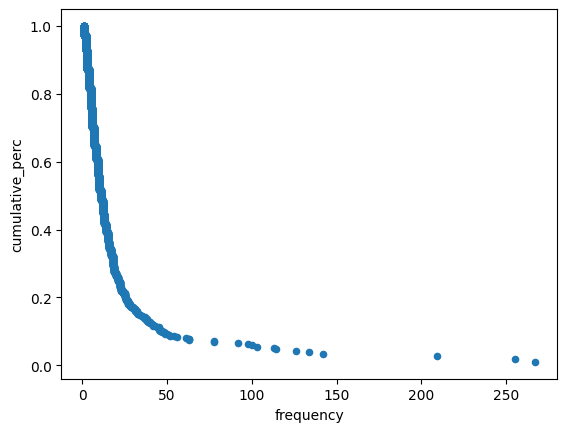

In [ ]:
table4.plot('frequency','cumulative_perc',kind='scatter')

In [ ]:
table5 = freq_tbl(data['host_location'])

In [ ]:
table5_2 = table5.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro5 = table5_2[table5_2['frequency']>9]
filtro5

host_location  frequency
0             Mexico City, Mexico      17058
1       Host Location unavailable       5606
2                          Mexico        941
3        Ciudad de México, Mexico        373
4        Federal District, Mexico        210
5                    New York, NY        192
6        Ciudad de Mexico, Mexico        179
7   Santiago de Querétaro, Mexico        171
8     Naucalpan de Juárez, Mexico         83
9              Cuernavaca, Mexico         76
10                 Cancún, Mexico         70
11        State of Mexico, Mexico         55
12                Los Angeles, CA         50
13            Guadalajara, Mexico         48
14       Playa del Carmen, Mexico         47
15              Naucalpan, Mexico         41
16    Ciudad López Mateos, Mexico         38
17                 Toluca, Mexico         36
18  San Miguel de Allende, Mexico         35
19         London, United Kingdom         33
20              Monterrey, Mexico         27
21                 Puebla, Mexico         24
22                  Madrid, Spain         24
23                  Tulum, Mexico         23
24                  Paris, France         20
25                Pachuca, Mexico         19
26              San Francisco, CA         18
27                 Mérida, Mexico         18
28              Concepción, Chile         17
29                 Oaxaca, Mexico         17
30              Vancouver, Canada         15
31                  San Diego, CA         14
32        Puerto Vallarta, Mexico         13
33                Zapopan, Mexico         13
34                     Austin, TX         12
35                      Miami, FL         12
36        England, United Kingdom         12
37         Álvaro Obregón, Mexico         11
38    Tlalnepantla de Baz, Mexico         11
39                Morelia, Mexico         11
40                 Washington, DC         11
41                Tijuana, Mexico         10
42               Culiacán, Mexico         10
43                San Antonio, TX         10
44                     Dallas, TX         10
45                Berlin, Germany         10
46           Tlalnepantla, Mexico         10
47                Toronto, Canada         10
48                  United States         10

In [ ]:
filtro_index5 = filtro5.set_index('host_location')
filtro_index5

frequency
host_location                           
Mexico City, Mexico                17058
Host Location unavailable           5606
Mexico                               941
Ciudad de México, Mexico             373
Federal District, Mexico             210
New York, NY                         192
Ciudad de Mexico, Mexico             179
Santiago de Querétaro, Mexico        171
Naucalpan de Juárez, Mexico           83
Cuernavaca, Mexico                    76
Cancún, Mexico                        70
State of Mexico, Mexico               55
Los Angeles, CA                       50
Guadalajara, Mexico                   48
Playa del Carmen, Mexico              47
Naucalpan, Mexico                     41
Ciudad López Mateos, Mexico           38
Toluca, Mexico                        36
San Miguel de Allende, Mexico         35
London, United Kingdom                33
Monterrey, Mexico                     27
Puebla, Mexico                        24
Madrid, Spain                         24
Tulum, Mexico                         23
Paris, France                         20
Pachuca, Mexico                       19
San Francisco, CA                     18
Mérida, Mexico                        18
Concepción, Chile                     17
Oaxaca, Mexico                        17
Vancouver, Canada                     15
San Diego, CA                         14
Puerto Vallarta, Mexico               13
Zapopan, Mexico                       13
Austin, TX                            12
Miami, FL                             12
England, United Kingdom               12
Álvaro Obregón, Mexico                11
Tlalnepantla de Baz, Mexico           11
Morelia, Mexico                       11
Washington, DC                        11
Tijuana, Mexico                       10
Culiacán, Mexico                      10
San Antonio, TX                       10
Dallas, TX                            10
Berlin, Germany                       10
Tlalnepantla, Mexico                  10
Toronto, Canada                       10
United States                         10

Text(0, 0.5, 'Frequency')

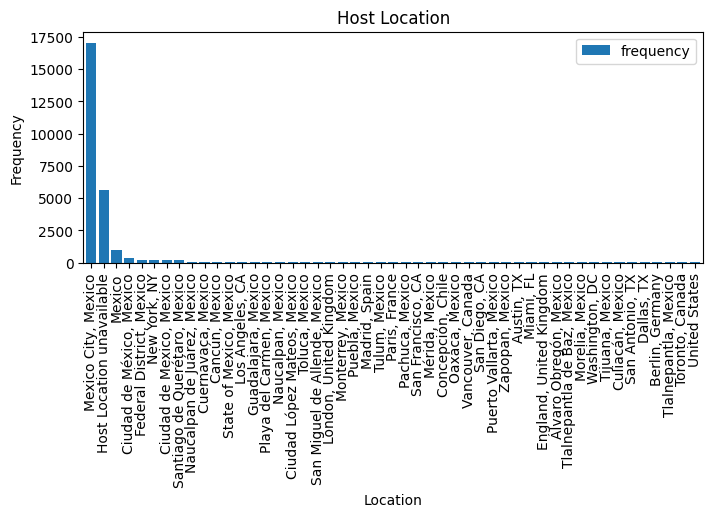

In [ ]:
filtro_index5.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Location')
plt.xlabel('Location')
plt.ylabel('Frequency')

In [ ]:
table6 = freq_tbl(data['host_response_time'])
table6

host_response_time  frequency  percentage  cumulative_perc
0             within an hour      18401    0.693435         0.693435
1  Response time unavailable       4197    0.158162         0.851598
2         within a few hours       2016    0.075972         0.927570
3               within a day       1098    0.041378         0.968948
4         a few days or more        824    0.031052         1.000000

In [ ]:
table6_2 = table6.drop(['percentage','cumulative_perc'],axis=1)
table6_2

host_response_time  frequency
0             within an hour      18401
1  Response time unavailable       4197
2         within a few hours       2016
3               within a day       1098
4         a few days or more        824

In [ ]:
filtro6 = table6_2[table6_2['frequency']>1]
filtro6

host_response_time  frequency
0             within an hour      18401
1  Response time unavailable       4197
2         within a few hours       2016
3               within a day       1098
4         a few days or more        824

In [ ]:
filtro_index6 = filtro6.set_index('host_response_time')
filtro_index6

frequency
host_response_time                  
within an hour                 18401
Response time unavailable       4197
within a few hours              2016
within a day                    1098
a few days or more               824

<Axes: ylabel='frequency'>

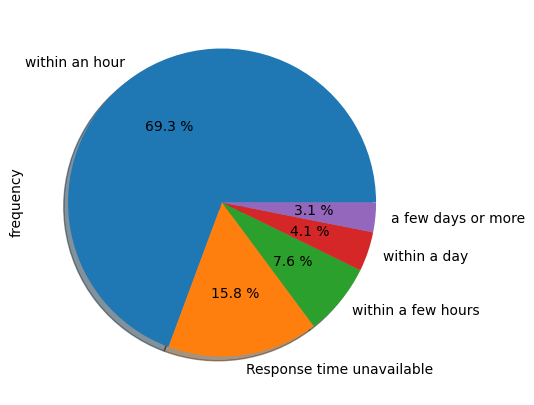

In [ ]:
filtro_index6['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table7 = freq_tbl(data['host_is_superhost'])
table7

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      15830    0.596548         0.596548
1                 t      10706    0.403452         1.000000

In [ ]:
table7_2 = table7.drop(['percentage','cumulative_perc'],axis=1)
table7_2

host_is_superhost  frequency
0                 f      15830
1                 t      10706

In [ ]:
filtro7 = table7_2[table7_2['frequency']>1]
filtro7

host_is_superhost  frequency
0                 f      15830
1                 t      10706

In [ ]:
filtro_index7 = filtro7.set_index('host_is_superhost')
filtro_index7

frequency
host_is_superhost           
f                      15830
t                      10706

<Axes: ylabel='frequency'>

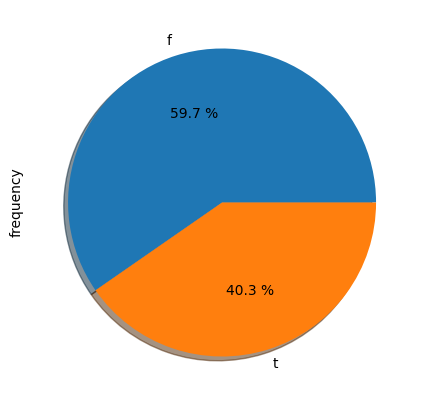

In [ ]:
filtro_index7['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table8 = freq_tbl(data['host_verifications'])
table8

host_verifications  frequency  percentage  cumulative_perc
0                ['email', 'phone']      20494    0.772309         0.772309
1  ['email', 'phone', 'work_email']       3382    0.127450         0.899759
2                         ['phone']       2477    0.093345         0.993104
3           ['phone', 'work_email']        127    0.004786         0.997890
4                         ['email']         32    0.001206         0.999096
5                                []         22    0.000829         0.999925
6           ['email', 'work_email']          1    0.000038         0.999962
7                    ['work_email']          1    0.000038         1.000000

In [ ]:
table8_2 = table8.drop(['percentage','cumulative_perc'],axis=1)
table8_2

host_verifications  frequency
0                ['email', 'phone']      20494
1  ['email', 'phone', 'work_email']       3382
2                         ['phone']       2477
3           ['phone', 'work_email']        127
4                         ['email']         32
5                                []         22
6           ['email', 'work_email']          1
7                    ['work_email']          1

In [ ]:
filtro8 = table8_2[table8_2['frequency']>1]
filtro8

host_verifications  frequency
0                ['email', 'phone']      20494
1  ['email', 'phone', 'work_email']       3382
2                         ['phone']       2477
3           ['phone', 'work_email']        127
4                         ['email']         32
5                                []         22

In [ ]:
filtro_index8 = filtro8.set_index('host_verifications')
filtro_index8

frequency
host_verifications                         
['email', 'phone']                    20494
['email', 'phone', 'work_email']       3382
['phone']                              2477
['phone', 'work_email']                 127
['email']                                32
[]                                       22

<Axes: ylabel='frequency'>

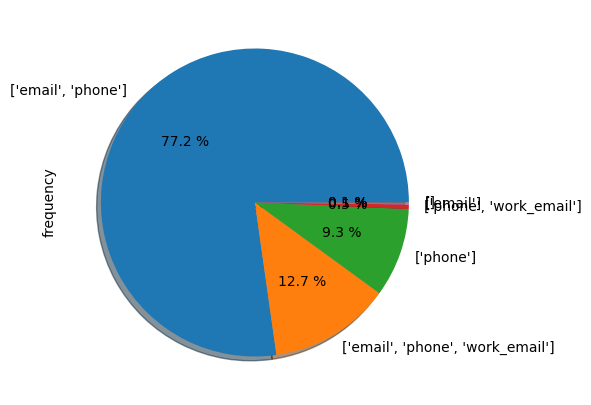

In [ ]:
filtro_index8['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table9 = freq_tbl(data['host_has_profile_pic'])
table9

host_has_profile_pic  frequency  percentage  cumulative_perc
0                    t      26059    0.982024         0.982024
1                    f        477    0.017976         1.000000

In [ ]:
table9_2 = table9.drop(['percentage','cumulative_perc'],axis=1)
table9_2

host_has_profile_pic  frequency
0                    t      26059
1                    f        477

In [ ]:
filtro9 = table9_2[table9_2['frequency']>1]
filtro9

host_has_profile_pic  frequency
0                    t      26059
1                    f        477

In [ ]:
filtro_index9 = filtro9.set_index('host_has_profile_pic')
filtro_index9

frequency
host_has_profile_pic           
t                         26059
f                           477

<Axes: ylabel='frequency'>

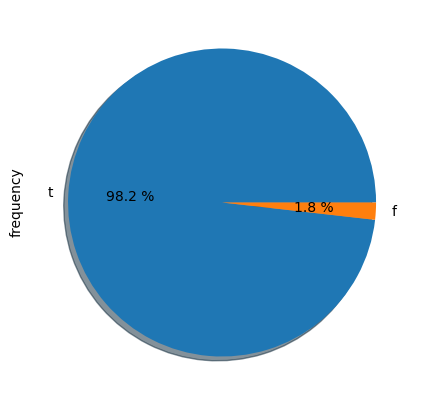

In [ ]:
filtro_index9['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table10 = freq_tbl(data['host_identity_verified'])
table10

host_identity_verified  frequency  percentage  cumulative_perc
0                      t      25478     0.96013          0.96013
1                      f       1058     0.03987          1.00000

In [ ]:
table10_2 = table10.drop(['percentage','cumulative_perc'],axis=1)
table10_2

host_identity_verified  frequency
0                      t      25478
1                      f       1058

In [ ]:
filtro10 = table10_2[table10_2['frequency']>1]
filtro10

host_identity_verified  frequency
0                      t      25478
1                      f       1058

In [ ]:
filtro_index10 = filtro10.set_index('host_identity_verified')
filtro_index10

frequency
host_identity_verified           
t                           25478
f                            1058

<Axes: ylabel='frequency'>

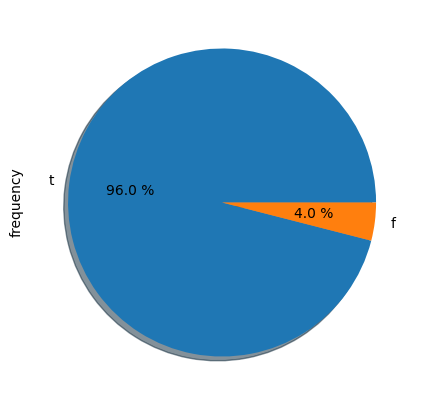

In [ ]:
filtro_index10['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table11 = freq_tbl(data['neighbourhood_cleansed'])
table11

neighbourhood_cleansed  frequency  percentage  cumulative_perc
0               Cuauhtémoc      12192    0.459451         0.459451
1           Miguel Hidalgo       4602    0.173425         0.632876
2            Benito Juárez       3137    0.118217         0.751093
3                 Coyoacán       1714    0.064591         0.815684
4           Álvaro Obregón       1093    0.041189         0.856874
5                  Tlalpan        798    0.030072         0.886946
6      Venustiano Carranza        730    0.027510         0.914456
7        Gustavo A. Madero        517    0.019483         0.933939
8    Cuajimalpa de Morelos        443    0.016694         0.950633
9                Iztacalco        384    0.014471         0.965104
10            Azcapotzalco        304    0.011456         0.976560
11              Iztapalapa        264    0.009949         0.986509
12              Xochimilco        141    0.005314         0.991822
13  La Magdalena Contreras        139    0.005238         0.997061
14                 Tláhuac         49    0.001847         0.998907
15              Milpa Alta         29    0.001093         1.000000

In [ ]:
table11_2 = table11.drop(['percentage','cumulative_perc'],axis=1)
table11_2

neighbourhood_cleansed  frequency
0               Cuauhtémoc      12192
1           Miguel Hidalgo       4602
2            Benito Juárez       3137
3                 Coyoacán       1714
4           Álvaro Obregón       1093
5                  Tlalpan        798
6      Venustiano Carranza        730
7        Gustavo A. Madero        517
8    Cuajimalpa de Morelos        443
9                Iztacalco        384
10            Azcapotzalco        304
11              Iztapalapa        264
12              Xochimilco        141
13  La Magdalena Contreras        139
14                 Tláhuac         49
15              Milpa Alta         29

In [ ]:
filtro11 = table11_2[table11_2['frequency']>1]
filtro11

neighbourhood_cleansed  frequency
0               Cuauhtémoc      12192
1           Miguel Hidalgo       4602
2            Benito Juárez       3137
3                 Coyoacán       1714
4           Álvaro Obregón       1093
5                  Tlalpan        798
6      Venustiano Carranza        730
7        Gustavo A. Madero        517
8    Cuajimalpa de Morelos        443
9                Iztacalco        384
10            Azcapotzalco        304
11              Iztapalapa        264
12              Xochimilco        141
13  La Magdalena Contreras        139
14                 Tláhuac         49
15              Milpa Alta         29

In [ ]:
filtro_index11 = filtro11.set_index('neighbourhood_cleansed')
filtro_index11

frequency
neighbourhood_cleansed           
Cuauhtémoc                  12192
Miguel Hidalgo               4602
Benito Juárez                3137
Coyoacán                     1714
Álvaro Obregón               1093
Tlalpan                       798
Venustiano Carranza           730
Gustavo A. Madero             517
Cuajimalpa de Morelos         443
Iztacalco                     384
Azcapotzalco                  304
Iztapalapa                    264
Xochimilco                    141
La Magdalena Contreras        139
Tláhuac                        49
Milpa Alta                     29

Text(0, 0.5, 'Frequency')

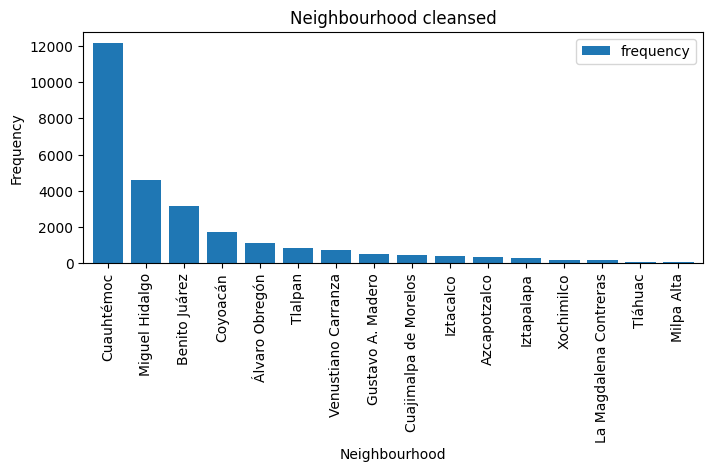

In [ ]:
filtro_index11.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Neighbourhood cleansed')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')

In [ ]:
table12 = freq_tbl(data['property_type'])
table12

property_type  frequency  percentage  cumulative_perc
0                   Entire rental unit       9936    0.374435         0.374435
1                         Entire condo       3509    0.132235         0.506670
2          Private room in rental unit       3011    0.113468         0.620139
3                 Private room in home       2226    0.083886         0.704025
4                          Entire loft       1529    0.057620         0.761645
5            Entire serviced apartment        863    0.032522         0.794166
6                Private room in condo        849    0.031994         0.826161
7                          Entire home        814    0.030675         0.856836
8                        Room in hotel        435    0.016393         0.873229
9           Private room in guesthouse        380    0.014320         0.887549
10         Private room in guest suite        285    0.010740         0.898289
11  Private room in serviced apartment        267    0.010062         0.908351
12   Private room in bed and breakfast        266    0.010024         0.918375
13                  Entire guest suite        243    0.009157         0.927532
14     Private room in casa particular        236    0.008894         0.936426
15              Room in boutique hotel        186    0.007009         0.943435
16                Private room in loft        129    0.004861         0.948297
17                 Shared room in home        113    0.004258         0.952555
18                   Entire guesthouse        107    0.004032         0.956587
19              Private room in hostel         94    0.003542         0.960130
20           Private room in townhouse         85    0.003203         0.963333
21          Shared room in rental unit         80    0.003015         0.966348
22               Shared room in hostel         76    0.002864         0.969212
23                  Room in aparthotel         64    0.002412         0.971623
24                           Tiny home         61    0.002299         0.973922
25                  Shipping container         59    0.002223         0.976146
26                    Entire townhouse         51    0.001922         0.978068
27                Entire vacation home         49    0.001847         0.979914
28           Shared room in guesthouse         48    0.001809         0.981723
29                        Private room         37    0.001394         0.983117
30                     Casa particular         36    0.001357         0.984474
31                        Entire place         30    0.001131         0.985604
32           Private room in tiny home         30    0.001131         0.986735
33          Room in serviced apartment         30    0.001131         0.987866
34                        Entire cabin         27    0.001017         0.988883
35    Shared room in bed and breakfast         25    0.000942         0.989825
36       Private room in vacation home         22    0.000829         0.990654
37           Room in bed and breakfast         19    0.000716         0.991370
38               Private room in cabin         18    0.000678         0.992049
39                        Holiday park         17    0.000641         0.992689
40                      Entire cottage         17    0.000641         0.993330
41                Shared room in hotel         15    0.000565         0.993895
42               Private room in villa         14    0.000528         0.994423
43                        Entire villa         13    0.000490         0.994913
44                 Private room in hut         11    0.000415         0.995327
45                                 Hut          9    0.000339         0.995666
46                Shared room in condo          9    0.000339         0.996005
47                Private room in dome          8    0.000301         0.996307
48      Shared room in casa particular          8    0.000301         0.996608
49   Shared room in serviced apartment          5    0.000188         0.996

In [ ]:
table12_2 = table12.drop(['percentage','cumulative_perc'],axis=1)
table12_2

property_type  frequency
0                   Entire rental unit       9936
1                         Entire condo       3509
2          Private room in rental unit       3011
3                 Private room in home       2226
4                          Entire loft       1529
5            Entire serviced apartment        863
6                Private room in condo        849
7                          Entire home        814
8                        Room in hotel        435
9           Private room in guesthouse        380
10         Private room in guest suite        285
11  Private room in serviced apartment        267
12   Private room in bed and breakfast        266
13                  Entire guest suite        243
14     Private room in casa particular        236
15              Room in boutique hotel        186
16                Private room in loft        129
17                 Shared room in home        113
18                   Entire guesthouse        107
19              Private room in hostel         94
20           Private room in townhouse         85
21          Shared room in rental unit         80
22               Shared room in hostel         76
23                  Room in aparthotel         64
24                           Tiny home         61
25                  Shipping container         59
26                    Entire townhouse         51
27                Entire vacation home         49
28           Shared room in guesthouse         48
29                        Private room         37
30                     Casa particular         36
31                        Entire place         30
32           Private room in tiny home         30
33          Room in serviced apartment         30
34                        Entire cabin         27
35    Shared room in bed and breakfast         25
36       Private room in vacation home         22
37           Room in bed and breakfast         19
38               Private room in cabin         18
39                        Holiday park         17
40                      Entire cottage         17
41                Shared room in hotel         15
42               Private room in villa         14
43                        Entire villa         13
44                 Private room in hut         11
45                                 Hut          9
46                Shared room in condo          9
47                Private room in dome          8
48      Shared room in casa particular          8
49   Shared room in serviced apartment          5
50                                Tent          5
51            Shared room in townhouse          4
52           Private room in farm stay          4
53                 Shared room in loft          4
54                                Dome          4
55                         Shared room          3
56                            Campsite          3
57             Room in casa particular          3
58                           Farm stay          3
59        Private room in nature lodge          3
60  Private room in shipping container          3
61          Shared room in guest suite          3
62                     Entire bungalow          2
63               Private room in tower          2
64                Private room in tent          2
65              Private room in castle          2
66                 Shared room in tent          2
67                     Entire home/apt          2
68                       Entire chalet          2
69             Private room in cottage          2
70            Shared room in tiny home          2
71                Private room in barn          2
72                              Castle          2
73                       Entire hostel          2
74                      Room in hostel          1
75              Private room in resort          1
76                                Boat          1
77                        Earthen home          1
78           Private room in houseboat          1
79              Private r

In [ ]:
filtro12 = table12_2[table12_2['frequency']>0]

In [ ]:
filtro_index12 = filtro12.set_index('property_type')
filtro_index12

frequency
property_type                                
Entire rental unit                       9936
Entire condo                             3509
Private room in rental unit              3011
Private room in home                     2226
Entire loft                              1529
Entire serviced apartment                 863
Private room in condo                     849
Entire home                               814
Room in hotel                             435
Private room in guesthouse                380
Private room in guest suite               285
Private room in serviced apartment        267
Private room in bed and breakfast         266
Entire guest suite                        243
Private room in casa particular           236
Room in boutique hotel                    186
Private room in loft                      129
Shared room in home                       113
Entire guesthouse                         107
Private room in hostel                     94
Private room in townhouse                  85
Shared room in rental unit                 80
Shared room in hostel                      76
Room in aparthotel                         64
Tiny home                                  61
Shipping container                         59
Entire townhouse                           51
Entire vacation home                       49
Shared room in guesthouse                  48
Private room                               37
Casa particular                            36
Entire place                               30
Private room in tiny home                  30
Room in serviced apartment                 30
Entire cabin                               27
Shared room in bed and breakfast           25
Private room in vacation home              22
Room in bed and breakfast                  19
Private room in cabin                      18
Holiday park                               17
Entire cottage                             17
Shared room in hotel                       15
Private room in villa                      14
Entire villa                               13
Private room in hut                        11
Hut                                         9
Shared room in condo                        9
Private room in dome                        8
Shared room in casa particular              8
Shared room in serviced apartment           5
Tent                                        5
Shared room in townhouse                    4
Private room in farm stay                   4
Shared room in loft                         4
Dome                                        4
Shared room                                 3
Campsite                                    3
Room in casa particular                     3
Farm stay                                   3
Private room in nature lodge                3
Private room in shipping container          3
Shared room in guest suite                  3
Entire bungalow                             2
Private room in tower                       2
Private room in tent                        2
Private room in castle                      2
Shared room in tent                         2
Entire home/apt                             2
Entire chalet                               2
Private room in cottage                     2
Shared room in tiny home                    2
Private room in barn                        2
Castle                                      2
Entire hostel                               2
Room in hostel                              1
Private room in resort                      1
Boat                                        1
Earthen home                                1
Private room in houseboat                   1
Private room in chalet                      1
Private room in earthen home                1
Private room in dorm                        1
Private room in pension                     1
Shared room in vacation home                1
Private room in bungalow                    1
Private room in floor             

Text(0, 0.5, 'Frequency')

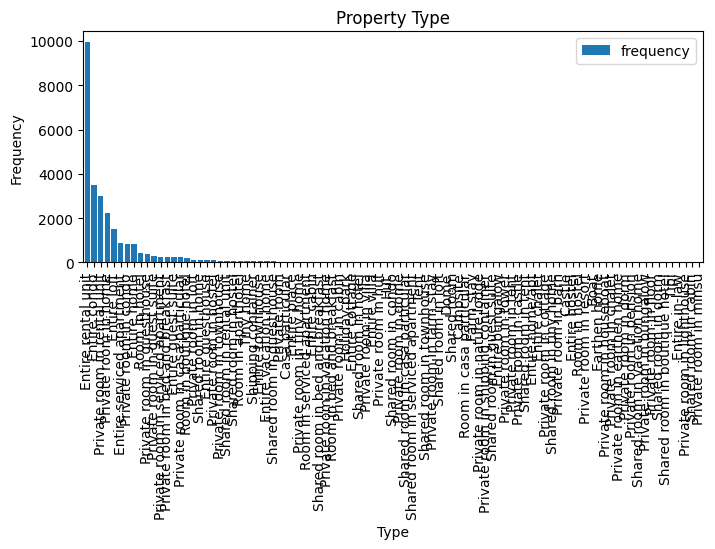

In [ ]:
filtro_index12.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Property Type')
plt.xlabel('Type')
plt.ylabel('Frequency')

In [ ]:
table13 = freq_tbl(data['room_type'])
table13

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      17432    0.656919         0.656919
1     Private room       8581    0.323372         0.980291
2      Shared room        401    0.015112         0.995402
3       Hotel room        122    0.004598         1.000000

In [ ]:
table13_2 = table13.drop(['percentage','cumulative_perc'],axis=1)
table13_2

room_type  frequency
0  Entire home/apt      17432
1     Private room       8581
2      Shared room        401
3       Hotel room        122

In [ ]:
filtro13 = table13_2[table13_2['frequency']>1]
filtro13

room_type  frequency
0  Entire home/apt      17432
1     Private room       8581
2      Shared room        401
3       Hotel room        122

In [ ]:
filtro_index13 = filtro13.set_index('room_type')
filtro_index13

frequency
room_type                 
Entire home/apt      17432
Private room          8581
Shared room            401
Hotel room             122

<Axes: ylabel='frequency'>

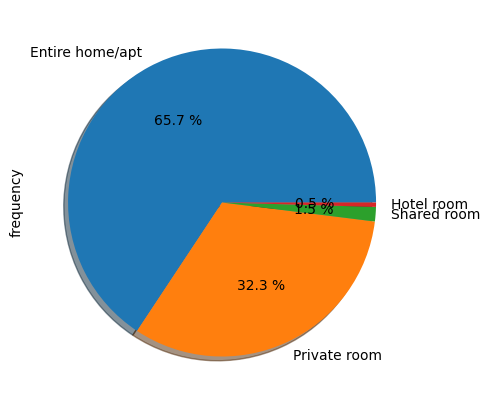

In [ ]:
filtro_index13['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table15 = freq_tbl(data['amenities'])

In [ ]:
table15_2 = table15.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro15 = table15_2[table15_2['frequency']>2]
filtro15

amenities  frequency
0    ["Wifi", "Essentials", "Private entrance", "Mi...         71
1                                                   []         45
2    ["Wifi", "Essentials", "Private entrance", "Mi...         34
3    ["Wifi", "Dryer \u2013\u00a0In unit", "Essenti...         25
4                  ["Washer", "Kitchen", "TV", "Wifi"]         22
5                            ["Wifi", "TV", "Kitchen"]         22
6    ["Washer", "Wifi", "Kitchen", "TV", "Dedicated...         21
7    ["Wifi", "Mini fridge", "Coffee maker", "Smoki...         19
8    ["Wifi", "Coffee maker", "Smoke alarm", "Essen...         19
9    ["Wifi", "Smart lock", "Essentials", "Room-dar...         19
10   ["Wifi", "Exterior security cameras on propert...         17
11    ["Wifi", "TV", "Dedicated workspace", "Kitchen"]         16
12   ["Building staff", "Wifi", "Cleaning products"...         15
13   ["Washer", "Wifi", "Kitchen", "TV", "Lock on b...         14
14   ["Wifi", "Coffee maker", "Dryer \u2013\u00a0In...         14
15   ["Wifi", "Exterior security cameras on property"]         14
16   ["Hot water", "Wifi", "Cleaning products", "Et...         13
17                                 ["Wifi", "Kitchen"]         12
18   ["Wifi", "Host greets you", "Portable fans", "...         12
19                                      ["Wifi", "TV"]         11
20   ["Wifi", "Coffee maker", "Smart lock", "Essent...         11
21   ["Washer", "Wifi", "Kitchen", "Free parking on...         11
22   ["Washer", "Wifi", "Kitchen", "TV", "Lock on b...         11
23   ["Wifi", "Outdoor dining area", "Lock on bedro...         11
24   ["Wifi", "Kitchen", "TV", "Lock on bedroom doo...         10
25   ["Wifi", "Coffee maker", "Essentials", "Room-d...         10
26   ["Washer", "Wifi", "Exterior security cameras ...         10
27   ["Wifi", "Pack \u2019n play/Travel crib", "Cof...         10
28   ["Wifi", "Smoke alarm", "Kitchen", "First aid ...         10
29   ["Washer", "Wifi", "Kitchen", "Free parking on...         10
30   ["Wifi", "Exterior security cameras on propert...         10
31   ["Wifi", "Outdoor furniture", "Ceiling fan", "...         10
32   ["Wifi", "Portable fans", "Coffee maker", "Ess...         10
33   ["Wifi", "Lock on bedroom door", "Dedicated wo...         10
34   ["Wifi", "Outdoor dining area", "Exterior secu...          9
35   ["Wifi", "Smoke alarm", "Kitchen", "First aid ...          9
36   ["Wifi", "Smoke alarm", "Essentials", "Buildin...          9
37   ["Wifi", "Coffee maker", "Smart lock", "Essent...          9
38   ["Wifi", "Coffee maker", "Smoking allowed", "E...          9
39   ["Wifi", "Exterior security cameras on propert...          9
40   ["Wifi", "Outdoor furniture", "Coffee maker", ...          8
41   ["Building staff", "Wifi", "Cleaning products"...          8
42   ["Washer", "Kitchen", "Dedicated workspace", "...          8
43   ["Wifi", "Pack \u2019n play/Travel crib", "Cof...          8
44   ["Washer", "Bed linens", "Wifi", "Coffee maker...          8
45   ["Hot water", "Washer", "Bed linens", "Exterio...          8
46   [". shampoo", "Wifi", "Coffee maker: Nespresso...          8
47   ["Wifi", "Mini fridge", "Portable fans", "Smok...          8
48   ["Wifi", "Mini fridge", "Portable fans", "Smok...          8
49   ["Wifi", "Exterior security cameras on propert...          8
50   ["Wifi", "Mini fridge", "Changing table", "Por...          8
51   ["Washer", "Wifi", "Kitchen", "Free parking on...          7
52   ["Wifi", "Smoke alarm", "Essentials", "Microwa...          7
53   ["Wifi", "Essentials", "Private entrance", "Lo...          7
54   ["Wifi", "Coffee maker", "Smoke alarm", "Essen...          7
55   ["Wifi", "Pack \u2019n play/Travel crib", "Cof...          7
56   ["Wifi", "Coffee maker", "Smoke alarm", "Essen...          7
57   ["Wifi", "Outdoor furniture", "Ceiling fan", "...          7
58   ["Wifi", "Pack \u2019n play/Travel crib", "Cof...          7
59   ["Washer", "Kitchen", "Lock on bedroom door", ...          7
60   ["Wifi", "Free

In [ ]:
filtro_index15 = filtro15.set_index('amenities')
filtro_index15

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

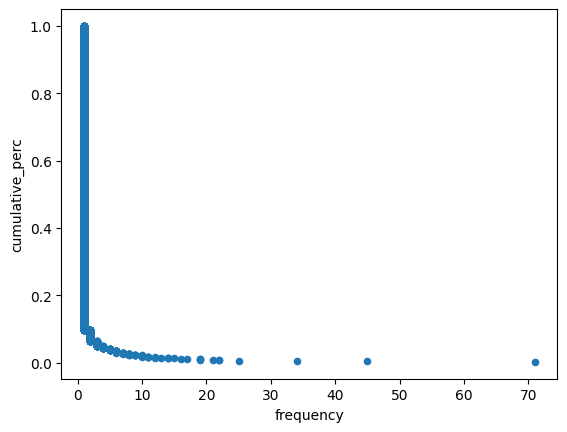

In [ ]:
table15.plot('frequency','cumulative_perc',kind='scatter')

In [ ]:
table16 = freq_tbl(data['has_availability'])
table16

has_availability  frequency  percentage  cumulative_perc
0                t      26488    0.998191         0.998191
1                f         48    0.001809         1.000000

In [ ]:
table16_2 = table16.drop(['percentage','cumulative_perc'],axis=1)
table16_2

has_availability  frequency
0                t      26488
1                f         48

In [ ]:
filtro16 = table16_2[table16_2['frequency']>1]
filtro16

has_availability  frequency
0                t      26488
1                f         48

In [ ]:
filtro_index16 = filtro16.set_index('has_availability')
filtro_index16

frequency
has_availability           
t                     26488
f                        48

<Axes: ylabel='frequency'>

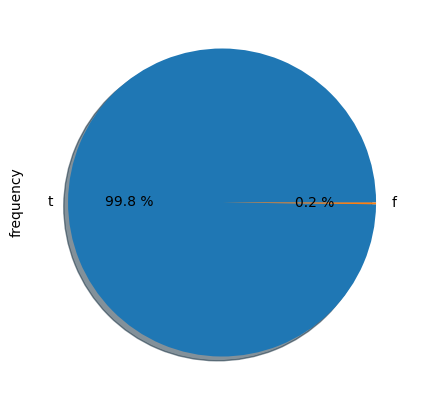

In [ ]:
filtro_index16['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table17 = freq_tbl(data['calendar_last_scraped'])
table17

calendar_last_scraped  frequency  percentage  cumulative_perc
0            2024-06-28      18404    0.693548         0.693548
1            2024-06-27       8132    0.306452         1.000000

In [ ]:
table17_2 = table17.drop(['percentage','cumulative_perc'],axis=1)
table17_2

calendar_last_scraped  frequency
0            2024-06-28      18404
1            2024-06-27       8132

In [ ]:
filtro17 = table17_2[table17_2['frequency']>1]
filtro17

calendar_last_scraped  frequency
0            2024-06-28      18404
1            2024-06-27       8132

In [ ]:
filtro_index17 = filtro17.set_index('calendar_last_scraped')
filtro_index17

frequency
calendar_last_scraped           
2024-06-28                 18404
2024-06-27                  8132

<Axes: ylabel='frequency'>

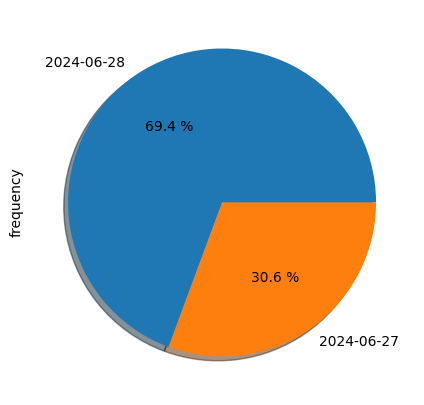

In [ ]:
filtro_index17['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

In [ ]:
table18 = freq_tbl(data['first_review'])

In [ ]:
table18_2 = table18.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro18 = table18_2[table18_2['frequency']>4]
filtro18

first_review  frequency
0      2030-12-31       3872
1      2023-08-27        118
2      2022-10-31        108
3      2023-10-30         91
4      2023-10-29         88
5      2024-05-19         73
6      2024-02-26         66
7      2022-10-30         65
8      2024-02-04         64
9      2024-02-25         64
10     2023-11-05         59
11     2023-06-25         58
12     2023-10-31         56
13     2022-11-21         54
14     2022-06-26         53
15     2024-04-21         53
16     2023-10-28         48
17     2024-05-26         46
18     2024-02-05         46
19     2023-08-28         46
20     2023-08-26         45
21     2024-03-18         44
22     2023-02-26         43
23     2023-02-27         43
24     2023-03-20         42
25     2023-11-20         41
26     2023-09-24         40
27     2023-10-08         40
28     2022-09-18         39
29     2022-11-01         38
30     2021-11-07         38
31     2023-10-01         37
32     2023-04-30         37
33     2024-04-14         37
34     2024-03-17         37
35     2024-04-28         37
36     2023-03-19         36
37     2023-04-09         36
38     2024-06-09         36
39     2024-01-21         35
40     2023-08-20         35
41     2023-11-04         34
42     2023-09-17         34
43     2022-07-31         34
44     2024-03-31         34
45     2022-10-16         34
46     2024-02-18         33
47     2023-07-16         33
48     2024-05-05         33
49     2024-03-25         32
50     2023-11-19         32
51     2021-10-31         32
52     2022-02-28         32
53     2023-08-13         32
54     2023-05-07         32
55     2022-11-02         32
56     2024-01-14         31
57     2022-03-21         31
58     2024-02-03         31
59     2022-11-20         31
60     2024-05-27         31
61     2022-10-23         31
62     2023-11-26         30
63     2024-03-24         30
64     2024-05-18         30
65     2024-02-11         30
66     2023-08-16         30
67     2023-10-22         30
68     2023-11-02         30
69     2023-08-25         30
70     2023-04-29         29
71     2023-12-10         29
72     2023-12-18         29
73     2023-11-03         29
74     2023-02-05         28
75     2023-05-14         28
76     2022-10-29         28
77     2023-05-01         28
78     2022-07-03         28
79     2024-03-03         28
80     2023-12-03         27
81     2022-11-06         27
82     2024-02-24         27
83     2024-06-23         27
84     2023-11-06         27
85     2023-03-12         27
86     2023-01-22         27
87     2024-06-02         27
88     2023-05-21         27
89     2024-05-12         27
90     2022-11-13         27
91     2023-08-06         27
92     2021-11-01         27
93     2024-03-30         27
94     2023-04-08         26
95     2024-03-10         26
96     2022-08-28         26
97     2024-02-29         26
98     2024-02-09         26
99     2022-10-02         26
100    2023-06-04         26
101    2023-05-28         26
102    2023-07-02         26
103    2017-11-20         26
104    2023-04-02         25
105    2024-01-28         25
106    2022-06-27         25
107    2022-04-04         25
108    2017-10-29         25
109    2021-11-06         25
110    2023-04-28         24
111    2024-04-22         24
112    2023-12-17         24
113    2023-07-08         24
114    2023-03-26         24
115    2023-02-12         24
116    2023-10-15         24
117    2022-12-11         24
118    2023-07-28         24
119    2023-07-09         24
120    2024-04-07         24
121    2021-11-08         24
122    2023-06-18         24
123    2023-07-14         23
124    2024-01-20         23
125    2023-01-15         23
126    2022-09-11         23
127    2022-08-21         23
128    2022-04-03         23
129    2019-04-21         23
130    2022-08-06         23
131    2022-05-15         23
132    2024-04-20         23
133    2023-02-28         23
134    2024-06-03         22
135    2019-06-30         22
136    2023-10-07         22
137

In [ ]:
filtro_index18 = filtro18.set_index('first_review')
filtro_index18

frequency
first_review           
2030-12-31         3872
2023-08-27          118
2022-10-31          108
2023-10-30           91
2023-10-29           88
2024-05-19           73
2024-02-26           66
2022-10-30           65
2024-02-04           64
2024-02-25           64
2023-11-05           59
2023-06-25           58
2023-10-31           56
2022-11-21           54
2022-06-26           53
2024-04-21           53
2023-10-28           48
2024-05-26           46
2024-02-05           46
2023-08-28           46
2023-08-26           45
2024-03-18           44
2023-02-26           43
2023-02-27           43
2023-03-20           42
2023-11-20           41
2023-09-24           40
2023-10-08           40
2022-09-18           39
2022-11-01           38
2021-11-07           38
2023-10-01           37
2023-04-30           37
2024-04-14           37
2024-03-17           37
2024-04-28           37
2023-03-19           36
2023-04-09           36
2024-06-09           36
2024-01-21           35
2023-08-20           35
2023-11-04           34
2023-09-17           34
2022-07-31           34
2024-03-31           34
2022-10-16           34
2024-02-18           33
2023-07-16           33
2024-05-05           33
2024-03-25           32
2023-11-19           32
2021-10-31           32
2022-02-28           32
2023-08-13           32
2023-05-07           32
2022-11-02           32
2024-01-14           31
2022-03-21           31
2024-02-03           31
2022-11-20           31
2024-05-27           31
2022-10-23           31
2023-11-26           30
2024-03-24           30
2024-05-18           30
2024-02-11           30
2023-08-16           30
2023-10-22           30
2023-11-02           30
2023-08-25           30
2023-04-29           29
2023-12-10           29
2023-12-18           29
2023-11-03           29
2023-02-05           28
2023-05-14           28
2022-10-29           28
2023-05-01           28
2022-07-03           28
2024-03-03           28
2023-12-03           27
2022-11-06           27
2024-02-24           27
2024-06-23           27
2023-11-06           27
2023-03-12           27
2023-01-22           27
2024-06-02           27
2023-05-21           27
2024-05-12           27
2022-11-13           27
2023-08-06           27
2021-11-01           27
2024-03-30           27
2023-04-08           26
2024-03-10           26
2022-08-28           26
2024-02-29           26
2024-02-09           26
2022-10-02           26
2023-06-04           26
2023-05-28           26
2023-07-02           26
2017-11-20           26
2023-04-02           25
2024-01-28           25
2022-06-27           25
2022-04-04           25
2017-10-29           25
2021-11-06           25
2023-04-28           24
2024-04-22           24
2023-12-17           24
2023-07-08           24
2023-03-26           24
2023-02-12           24
2023-10-15           24
2022-12-11           24
2023-07-28           24
2023-07-09           24
2024-04-07           24
2021-11-08           24
2023-06-18           24
2023-07-14           23
2024-01-20           23
2023-01-15           23
2022-09-11           23
2022-08-21           23
2022-04-03           23
2019-04-21           23
2022-08-06           23
2022-05-15           23
2024-04-20           23
2023-02-28           23
2024-06-03           22
2019-06-30           22
2023-10-07           22
2022-11-03           22
2023-04-16           22
2022-04-05           22
2024-01-01           22
2021-11-28           22
2022-02-20           22
2021-12-05           22
2024-02-06           22
2024-02-10           22
2023-06-30           22
2024-04-01           22
2023-02-19           22
2024-04-27           22
2023-07-29           22
2023-09-10           22
2022-01-02           22
2024-05-25           21
2022-12-18           21
2023-07-13           21
2022-03-20           21
2019-10-06           21
2019-11-18           21
2023-09-30           21
2023-12-29           21
2024-04-15           21
2022-11-19           21
2023-08-29           21
2022-11-27           21
2022-0

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

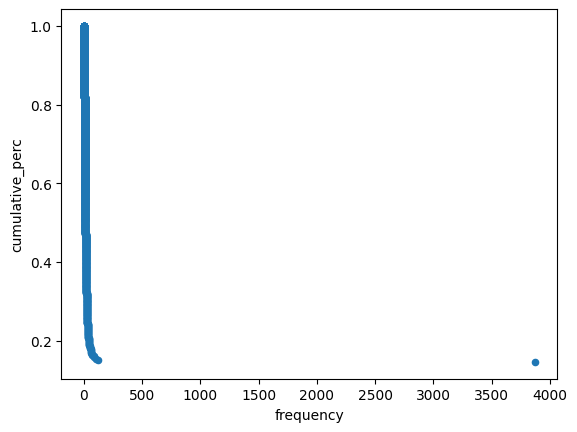

In [ ]:
table18.plot('frequency','cumulative_perc',kind='scatter')

In [ ]:
table19 = freq_tbl(data['last_review'])


In [ ]:
table19_2 = table19.drop(['percentage','cumulative_perc'],axis=1)

In [ ]:
filtro19 = table19_2[table19_2['frequency']>3]
filtro19

last_review  frequency
0    2030-12-31       3872
1    2024-06-23        878
2    2024-06-09        855
3    2024-06-16        542
4    2024-06-24        523
5    2024-05-26        477
6    2024-06-10        465
7    2024-05-27        451
8    2024-06-22        377
9    2024-05-19        346
10   2024-06-08        342
11   2024-06-02        326
12   2024-06-12        321
13   2024-06-11        319
14   2024-06-21        317
15   2024-06-17        313
16   2024-06-15        301
17   2024-06-13        299
18   2024-06-01        283
19   2024-06-07        275
20   2024-05-31        274
21   2024-06-25        271
22   2024-06-19        261
23   2024-06-14        260
24   2024-06-20        259
25   2024-06-18        253
26   2024-05-28        238
27   2024-06-06        235
28   2024-06-03        191
29   2024-06-26        182
30   2024-06-05        164
31   2024-03-31        163
32   2024-02-26        162
33   2024-05-25        149
34   2024-02-25        148
35   2024-05-20        147
36   2024-05-29        143
37   2024-06-04        143
38   2024-05-05        136
39   2024-04-21        133
40   2024-05-30        129
41   2024-05-24        122
42   2024-05-18        122
43   2024-04-28        111
44   2024-05-22        101
45   2024-04-01         98
46   2024-04-30         95
47   2024-05-23         90
48   2024-03-30         89
49   2024-03-18         89
50   2024-04-29         86
51   2023-08-27         85
52   2024-03-17         83
53   2023-10-29         83
54   2023-10-30         83
55   2024-05-12         81
56   2024-05-06         80
57   2024-05-17         77
58   2024-05-04         77
59   2024-05-21         77
60   2024-04-22         75
61   2024-04-14         73
62   2024-05-13         71
63   2024-03-25         69
64   2024-06-27         68
65   2024-04-27         67
66   2024-03-29         63
67   2024-02-04         62
68   2024-05-01         61
69   2024-02-05         61
70   2024-04-07         59
71   2022-10-31         59
72   2024-04-23         59
73   2024-04-06         59
74   2024-03-02         58
75   2024-03-24         58
76   2024-05-07         52
77   2024-05-10         52
78   2024-04-20         52
79   2024-05-14         51
80   2024-04-15         51
81   2024-05-15         50
82   2024-05-08         50
83   2024-05-03         49
84   2024-02-29         49
85   2023-08-28         48
86   2024-05-16         48
87   2024-04-26         48
88   2023-11-05         48
89   2024-04-02         48
90   2024-05-11         47
91   2023-11-20         47
92   2024-04-18         45
93   2023-10-31         45
94   2024-03-26         43
95   2024-04-05         42
96   2024-04-19         42
97   2024-04-25         42
98   2024-04-24         42
99   2022-10-30         41
100  2024-02-11         41
101  2024-02-24         41
102  2024-04-13         41
103  2024-02-27         41
104  2024-05-09         41
105  2024-03-03         41
106  2024-03-10         39
107  2024-04-16         38
108  2024-04-17         38
109  2024-03-01         38
110  2024-01-01         38
111  2024-03-19         37
112  2023-11-19         37
113  2023-12-03         37
114  2024-03-28         36
115  2024-04-03         35
116  2024-04-08         34
117  2023-11-03         34
118  2024-02-18         34
119  2024-05-02         34
120  2024-03-27         34
121  2024-02-28         33
122  2023-11-06         32
123  2024-03-11         32
124  2024-01-02         31
125  2024-02-03         30
126  2024-04-04         29
127  2023-12-30         29
128  2022-11-21         28
129  2024-03-09         27
130  2024-03-04         27
131  2024-02-10         26
132  2022-11-20         26
133  2024-01-31         26
134  2024-03-20         26
135  2024-04-09         25
136  2024-02-19         25
137  2024-01-14         25
138  2023-11-26         25
139  2024-04-12         25
140  2024-03-07         25
141  2024-02-12         24
142  2024-03-23         24
143  2024-01-21         24
144  2023-06-25         24
145  2023-11-02         24
146  2024-03-22         24
147  202

In [ ]:
filtro_index19 = filtro19.set_index('last_review')
filtro_index19

frequency
last_review           
2030-12-31        3872
2024-06-23         878
2024-06-09         855
2024-06-16         542
2024-06-24         523
2024-05-26         477
2024-06-10         465
2024-05-27         451
2024-06-22         377
2024-05-19         346
2024-06-08         342
2024-06-02         326
2024-06-12         321
2024-06-11         319
2024-06-21         317
2024-06-17         313
2024-06-15         301
2024-06-13         299
2024-06-01         283
2024-06-07         275
2024-05-31         274
2024-06-25         271
2024-06-19         261
2024-06-14         260
2024-06-20         259
2024-06-18         253
2024-05-28         238
2024-06-06         235
2024-06-03         191
2024-06-26         182
2024-06-05         164
2024-03-31         163
2024-02-26         162
2024-05-25         149
2024-02-25         148
2024-05-20         147
2024-05-29         143
2024-06-04         143
2024-05-05         136
2024-04-21         133
2024-05-30         129
2024-05-24         122
2024-05-18         122
2024-04-28         111
2024-05-22         101
2024-04-01          98
2024-04-30          95
2024-05-23          90
2024-03-30          89
2024-03-18          89
2024-04-29          86
2023-08-27          85
2024-03-17          83
2023-10-29          83
2023-10-30          83
2024-05-12          81
2024-05-06          80
2024-05-17          77
2024-05-04          77
2024-05-21          77
2024-04-22          75
2024-04-14          73
2024-05-13          71
2024-03-25          69
2024-06-27          68
2024-04-27          67
2024-03-29          63
2024-02-04          62
2024-05-01          61
2024-02-05          61
2024-04-07          59
2022-10-31          59
2024-04-23          59
2024-04-06          59
2024-03-02          58
2024-03-24          58
2024-05-07          52
2024-05-10          52
2024-04-20          52
2024-05-14          51
2024-04-15          51
2024-05-15          50
2024-05-08          50
2024-05-03          49
2024-02-29          49
2023-08-28          48
2024-05-16          48
2024-04-26          48
2023-11-05          48
2024-04-02          48
2024-05-11          47
2023-11-20          47
2024-04-18          45
2023-10-31          45
2024-03-26          43
2024-04-05          42
2024-04-19          42
2024-04-25          42
2024-04-24          42
2022-10-30          41
2024-02-11          41
2024-02-24          41
2024-04-13          41
2024-02-27          41
2024-05-09          41
2024-03-03          41
2024-03-10          39
2024-04-16          38
2024-04-17          38
2024-03-01          38
2024-01-01          38
2024-03-19          37
2023-11-19          37
2023-12-03          37
2024-03-28          36
2024-04-03          35
2024-04-08          34
2023-11-03          34
2024-02-18          34
2024-05-02          34
2024-03-27          34
2024-02-28          33
2023-11-06          32
2024-03-11          32
2024-01-02          31
2024-02-03          30
2024-04-04          29
2023-12-30          29
2022-11-21          28
2024-03-09          27
2024-03-04          27
2024-02-10          26
2022-11-20          26
2024-01-31          26
2024-03-20          26
2024-04-09          25
2024-02-19          25
2024-01-14          25
2023-11-26          25
2024-04-12          25
2024-03-07          25
2024-02-12          24
2024-03-23          24
2024-01-21          24
2023-06-25          24
2023-11-02          24
2024-03-22          24
2024-01-03          24
2023-11-30          24
2024-03-16          24
2023-12-10          24
2024-04-10          24
2024-03-12          24
2020-03-16          23
2023-12-18          23
2024-03-15          23
2023-12-31          23
2023-02-26          23
2023-10-01          23
2024-02-08          23
2023-12-02          22
2023-09-30          22
2024-02-17          21
2023-11-01          21
2024-02-23          21
2023-12-17          21
2024-01-30          21
2023-08-31          20
2024-02-20          20
2024-04-11          20
2024-03-08          20
2023-11-21          20
2023-08-26 

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

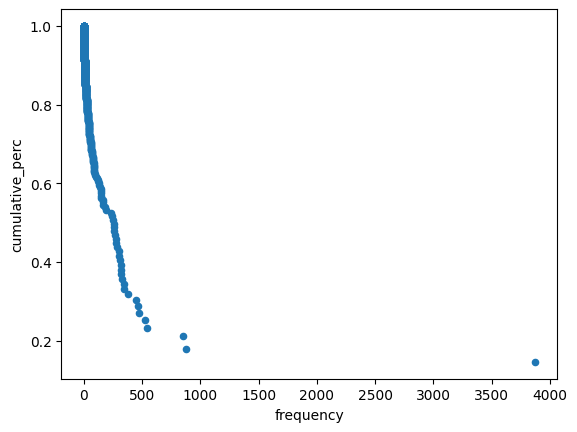

In [ ]:
table19.plot('frequency','cumulative_perc',kind='scatter')

In [ ]:
table20 = freq_tbl(data['instant_bookable'])
table20

instant_bookable  frequency  percentage  cumulative_perc
0                f      16081    0.606007         0.606007
1                t      10455    0.393993         1.000000

In [ ]:
table20_2 = table20.drop(['percentage','cumulative_perc'],axis=1)
table20_2

instant_bookable  frequency
0                f      16081
1                t      10455

In [ ]:
filtro20 = table20_2[table20_2['frequency']>1]
filtro20

instant_bookable  frequency
0                f      16081
1                t      10455

In [ ]:
filtro_index20 = filtro20.set_index('instant_bookable')
filtro_index20

frequency
instant_bookable           
f                     16081
t                     10455

<Axes: ylabel='frequency'>

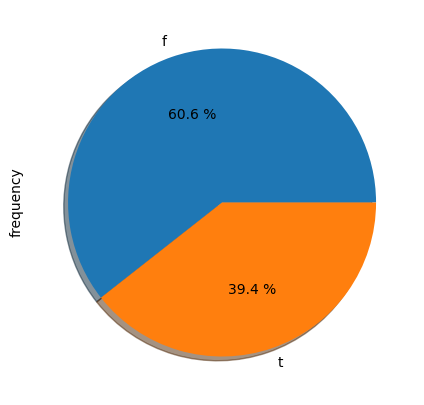

In [ ]:
filtro_index20['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f %%')

## Variables Numéricas



In [ ]:
data.head(3)

last_scraped       source                                          name  \
0   2024-06-28  city scrape  City SkyLine View from 1 Bedroom Apt in CDMX   
1   2024-06-27  city scrape                                   Villa Dante   
2   2024-06-28  city scrape                             CONDESA HAUS  B&B   

                                         description host_name  host_since  \
0  The LOCATION is undoubtedly THE BIG advantage ...     Marco  2013-01-21   
1  Dentro de Villa un estudio de arte con futon, ...      Dici  2010-06-28   
2  A new concept of hosting in mexico through a b...  Fernando  2010-08-09   

         host_location  host_response_time host_is_superhost  \
0  Mexico City, Mexico      within an hour                 t   
1  Mexico City, Mexico  a few days or more                 f   
2  Mexico City, Mexico      within an hour                 t   

                 host_verifications host_has_profile_pic  \
0                ['email', 'phone']                    t   
1  ['email', 'phone', 'work_email']                    t   
2  ['email', 'phone', 'work_email']                    t   

  host_identity_verified neighbourhood_cleansed       property_type  \
0                      t             Cuauhtémoc  Entire rental unit   
1                      t  Cuajimalpa de Morelos        Entire villa   
2                      t             Cuauhtémoc         Entire home   

         room_type                                          amenities  \
0  Entire home/apt  ["40 inch HDTV with Amazon Prime Video, Netfli...   
1  Entire home/apt  ["Hot water", "Washer", "Bed linens", "Wifi", ...   
2  Entire home/apt  ["Wifi", "Coffee maker: Nespresso", "Host gree...   

  has_availability calendar_last_scraped first_review last_review  \
0                t            2024-06-28   2013-03-30  2024-04-17   
1                t            2024-06-27   2030-12-31  2030-12-31   
2                t            2024-06-28   2011-11-09  2023-03-26   

  instant_bookable  accommodates  bathrooms  bedrooms  beds  availability_30  \
0                f          2.00       1.00      1.00  2.00                0   
1                f          2.00       1.00      1.00  1.00               28   
2                f          2.95       1.32      1.45  1.55               29   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                     0.0                  4.95                    4.93   
1                     0.0                  4.76                    4.80   
2                     0.0                  4.58                    4.56   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.95                   4.93   
1                       4.77                   4.85   
2                       4.70                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.93                 4.91   
1                         4.84                    4.85                 4.73   
2                         4.78                    4.98                 4.48   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.41   
1                                          0.0               1.70   
2                                          0.0               0.42   

   host_response_rate  host_acceptance_rate  latitude  longitude  \
0              100.00                  88.0  19.42063  -99.16586   
1               98.44                  91.0  19.38283  -99.17000   
2              100.00                  92.0  19.41162  -99.17794   

   minimum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0             3.0                     3.0                     3.0   
1             1.0                     1.0                     1.0   
2             1.0                     1.0                     1.0   

   minimum_nights_avg_ntm  availability_

In [ ]:
data1 = data.copy()

In [ ]:
max1 = data['host_response_rate'].max()
min1 = data['host_response_rate'].min()
limites1 = [min1,max1]
limites1

[88.0, 100.0]

In [ ]:
r1 = max1-min1
r1

ni1 = 1+3.32*np.log10(max1)
ni1

i1 = r1/ni1
i1

ni1

7.64

In [ ]:
intervalos1 = np.linspace(95.0,100.0,8)
intervalos1

array([ 95.        ,  95.71428571,  96.42857143,  97.14285714,
        97.85714286,  98.57142857,  99.28571429, 100.        ])

In [ ]:
categorias1 = ['Extremely_Slow','Too_Slow','Slow','Neutral','Fast','Too_Fast','Extremely_Fast']

data1['host_response_rate'] = pd.cut(x=data['host_response_rate'], bins=intervalos1, labels=categorias1)
data1['host_response_rate'].head(5)

0    Extremely_Fast
1              Fast
2    Extremely_Fast
3    Extremely_Fast
4               NaN
Name: host_response_rate, dtype: category
Categories (7, object): ['Extremely_Slow' < 'Too_Slow' < 'Slow' < 'Neutral' < 'Fast' < 'Too_Fast' <
                         'Extremely_Fast']

In [ ]:
data1['host_response_rate'] = data1['host_response_rate'].fillna(method='ffill')

<ipython-input-190-f38b11a85ab9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['host_response_rate'] = data1['host_response_rate'].fillna(method='ffill')


In [ ]:
table1 = freq_tbl(data1['host_response_rate'])
table1

host_response_rate  frequency  percentage  cumulative_perc
0     Extremely_Fast      22153    0.834828         0.834828
1               Fast       2892    0.108984         0.943812
2           Too_Fast        723    0.027246         0.971058
3               Slow        557    0.020990         0.992049
4           Too_Slow        211    0.007951         1.000000
5     Extremely_Slow          0    0.000000         1.000000
6            Neutral          0    0.000000         1.000000

In [ ]:
table1_2 = table1.drop(['percentage','cumulative_perc'],axis=1)

filtro1 = table1_2[table1_2['frequency']>0]

filtro_index1 = filtro1.set_index('host_response_rate')
filtro_index1

frequency
host_response_rate           
Extremely_Fast          22153
Fast                     2892
Too_Fast                  723
Slow                      557
Too_Slow                  211

Text(0, 0.5, 'Frequency')

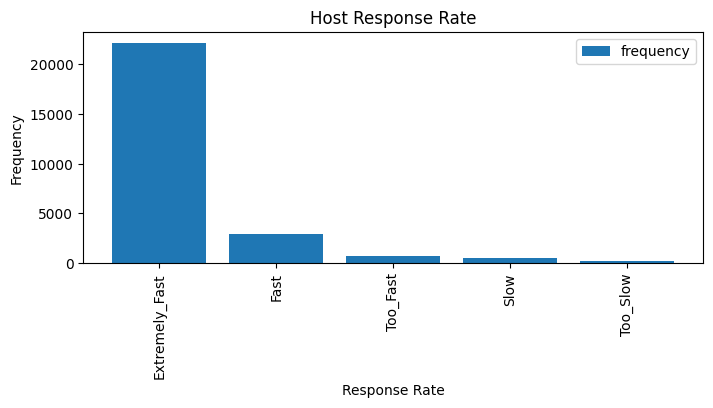

In [ ]:
filtro_index1.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Response Rate')
plt.xlabel('Response Rate')
plt.ylabel('Frequency')

In [ ]:
max2 = data['host_acceptance_rate'].max()
min2 = data['host_acceptance_rate'].min()
limites2 = [min2,max2]
limites2

[78.0, 100.0]

In [ ]:
r2 = max2-min2
r2

ni2 = 1+3.32*np.log10(max2)
ni2

i2 = r2/ni2
i2

ni2

7.64

In [ ]:
intervalos2 = np.linspace(78.0,100.0,8)
intervalos2

array([ 78.        ,  81.14285714,  84.28571429,  87.42857143,
        90.57142857,  93.71428571,  96.85714286, 100.        ])

In [ ]:
categorias2 = ['High_Rejection','Low_Rejection','Little_Rejection','Neutral','Little_Acceptance','Low_Acceptance','High_Acceptance']

data1['host_acceptance_rate'] = pd.cut(x=data['host_acceptance_rate'], bins=intervalos2, labels=categorias2)
data1['host_acceptance_rate'].head(5)

0              Neutral
1    Little_Acceptance
2    Little_Acceptance
3       Low_Acceptance
4      High_Acceptance
Name: host_acceptance_rate, dtype: category
Categories (7, object): ['High_Rejection' < 'Low_Rejection' < 'Little_Rejection' < 'Neutral' <
                         'Little_Acceptance' < 'Low_Acceptance' < 'High_Acceptance']

In [ ]:
data1['host_acceptance_rate'] = data1['host_acceptance_rate'].fillna(method='ffill')

<ipython-input-198-dd9ac3213437>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['host_acceptance_rate'] = data1['host_acceptance_rate'].fillna(method='ffill')


In [ ]:
table2 = freq_tbl(data1['host_acceptance_rate'])
table2

host_acceptance_rate  frequency  percentage  cumulative_perc
0      High_Acceptance      19916    0.750528         0.750528
1    Little_Acceptance       3773    0.142184         0.892712
2       Low_Acceptance       1204    0.045372         0.938084
3              Neutral        579    0.021819         0.959904
4     Little_Rejection        394    0.014848         0.974751
5        Low_Rejection        372    0.014019         0.988770
6       High_Rejection        298    0.011230         1.000000

In [ ]:
table2_2 = table2.drop(['percentage','cumulative_perc'],axis=1)

filtro2 = table2_2[table2_2['frequency']>0]

filtro_index2 = filtro2.set_index('host_acceptance_rate')
filtro_index2

frequency
host_acceptance_rate           
High_Acceptance           19916
Little_Acceptance          3773
Low_Acceptance             1204
Neutral                     579
Little_Rejection            394
Low_Rejection               372
High_Rejection              298

Text(0, 0.5, 'Frequency')

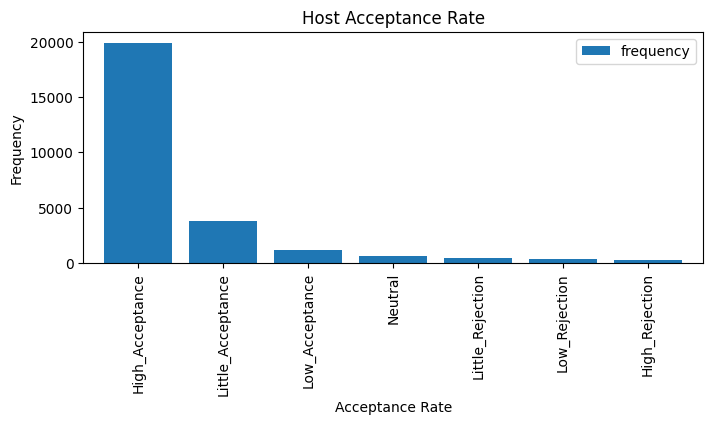

In [ ]:
filtro_index2.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Frequency')

In [ ]:
max3 = data['host_total_listings_count'].max()
min3 = data['host_total_listings_count'].min()
limites3 = [min3,max3]
limites3

[1.0, 39.0]

In [ ]:
r3 = max3-min3
r3

ni3 = 1+3.32*np.log10(max3)
ni3

i3 = r3/ni3
i3

ni3

6.2823344953279765

In [ ]:
intervalos3 = np.linspace(1.0,298.0,9)
intervalos3

array([  1.   ,  38.125,  75.25 , 112.375, 149.5  , 186.625, 223.75 ,
       260.875, 298.   ])

In [ ]:
categorias3 = ['Extremely_Few_Count','Very_Few_Count','Few_Count','Small_Count','Good_Count','Good_Amount_Count','Really_Good_Count','Extremely_Good_Count']

data1['host_total_listings_count'] = pd.cut(x=data['host_total_listings_count'], bins=intervalos3, labels=categorias3)
data1['host_total_listings_count'].head(5)

0    Extremely_Few_Count
1                    NaN
2    Extremely_Few_Count
3    Extremely_Few_Count
4    Extremely_Few_Count
Name: host_total_listings_count, dtype: category
Categories (8, object): ['Extremely_Few_Count' < 'Very_Few_Count' < 'Few_Count' < 'Small_Count' < 'Good_Count' <
                         'Good_Amount_Count' < 'Really_Good_Count' < 'Extremely_Good_Count']

In [ ]:
data1['host_total_listings_count'] = data1['host_total_listings_count'].fillna(method='ffill')

<ipython-input-206-e9e1405a3fca>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['host_total_listings_count'] = data1['host_total_listings_count'].fillna(method='ffill')


In [ ]:
table3 = freq_tbl(data1['host_total_listings_count'])
table3

host_total_listings_count  frequency  percentage  cumulative_perc
0       Extremely_Few_Count      26450    0.996759         0.996759
1            Very_Few_Count         86    0.003241         1.000000
2                 Few_Count          0    0.000000         1.000000
3               Small_Count          0    0.000000         1.000000
4                Good_Count          0    0.000000         1.000000
5         Good_Amount_Count          0    0.000000         1.000000
6         Really_Good_Count          0    0.000000         1.000000
7      Extremely_Good_Count          0    0.000000         1.000000

In [ ]:
table3_2 = table3.drop(['percentage','cumulative_perc'],axis=1)

filtro3 = table3_2[table3_2['frequency']>0]

filtro_index3 = filtro3.set_index('host_total_listings_count')
filtro_index3

frequency
host_total_listings_count           
Extremely_Few_Count            26450
Very_Few_Count                    86

Text(0, 0.5, 'Frequency')

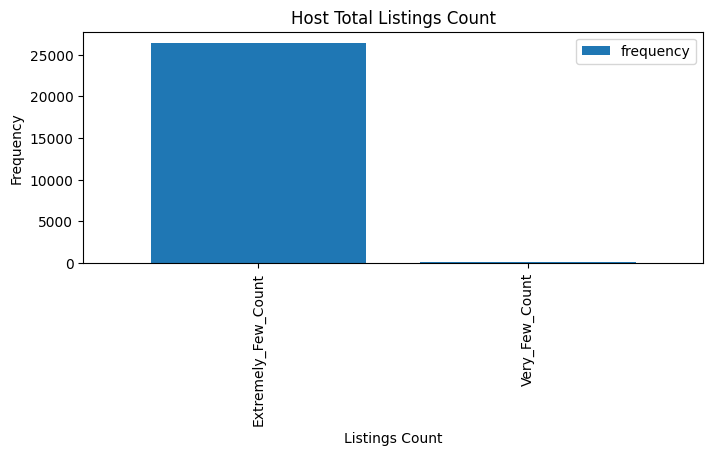

In [ ]:
filtro_index3.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Host Total Listings Count')
plt.xlabel('Listings Count')
plt.ylabel('Frequency')

In [ ]:
max4 = data['accommodates'].max()
min4 = data['accommodates'].min()
limites4 = [min4,max4]
limites4

[1.0, 7.0]

In [ ]:
r4 = max4-min4
r4

ni4 = 1+3.32*np.log10(max4)
ni4

i4 = r4/ni4
i4

ni4

3.8057254928473325

In [ ]:
intervalos4 = np.linspace(1.0,7.0,4)
intervalos4

array([1., 3., 5., 7.])

In [ ]:
categorias4 = ['Few','Mid','Lots']

data1['accommodates'] = pd.cut(x=data['accommodates'], bins=intervalos4, labels=categorias4)
data1['accommodates'].head(5)

0    Few
1    Few
2    Few
3    Mid
4    Mid
Name: accommodates, dtype: category
Categories (3, object): ['Few' < 'Mid' < 'Lots']

In [ ]:
data1['accommodates'] = data1['accommodates'].fillna(method='ffill')

<ipython-input-214-9f71f2b78d03>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['accommodates'] = data1['accommodates'].fillna(method='ffill')


In [ ]:
table4 = freq_tbl(data1['accommodates'])
table4

accommodates  frequency  percentage  cumulative_perc
0          Few      16113    0.607213         0.607213
1          Mid       8010    0.301854         0.909067
2         Lots       2413    0.090933         1.000000

In [ ]:
table4_2 = table4.drop(['percentage','cumulative_perc'],axis=1)

filtro4 = table4_2[table4_2['frequency']>0]

filtro_index4 = filtro4.set_index('accommodates')
filtro_index4

frequency
accommodates           
Few               16113
Mid                8010
Lots               2413

Text(0, 0.5, 'Frequency')

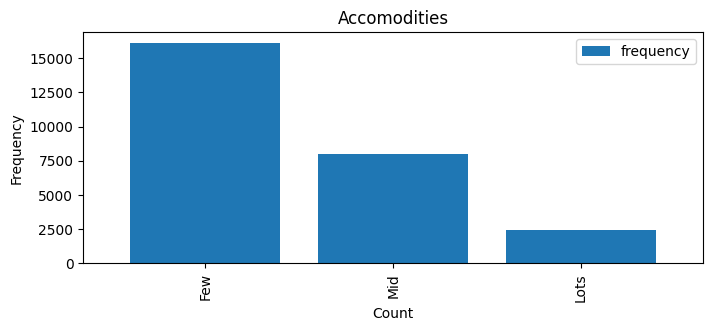

In [ ]:
filtro_index4.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Accomodities')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [ ]:
max6 = data['beds'].max()
min6 = data['beds'].min()
limites6 = [min6,max6]
limites6

[0.0, 3.0]

In [ ]:
r6 = max6-min6
r6

ni6 = 1+3.32*np.log10(max6)
ni6

i6 = r6/ni6
i6

ni6

2.584042565669279

In [ ]:
intervalos6 = np.linspace(0.0,3.0,3)
intervalos6

array([0. , 1.5, 3. ])

In [ ]:
categorias6 = ['Few','Lots']

data1['beds'] = pd.cut(x=data['beds'], bins=intervalos6, labels=categorias6)
data1['beds'].head(5)

0    Lots
1     Few
2    Lots
3    Lots
4    Lots
Name: beds, dtype: category
Categories (2, object): ['Few' < 'Lots']

In [ ]:
data1['beds'] = data1['beds'].fillna(method='ffill')

<ipython-input-222-9febb053ddfe>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['beds'] = data1['beds'].fillna(method='ffill')


In [ ]:
table6 = freq_tbl(data1['beds'])
table6

beds  frequency  percentage  cumulative_perc
0  Lots      15429    0.581437         0.581437
1   Few      11107    0.418563         1.000000

In [ ]:
table6_2 = table6.drop(['percentage','cumulative_perc'],axis=1)

filtro6 = table6_2[table6_2['frequency']>0]

filtro_index6 = filtro6.set_index('beds')
filtro_index6

frequency
beds           
Lots      15429
Few       11107

Text(0, 0.5, 'Frequency')

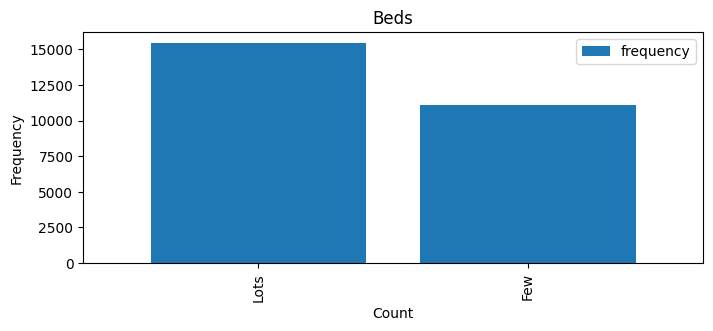

In [ ]:
filtro_index6.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Beds')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [ ]:
max7 = data['price'].max()
min7 = data['price'].min()
limites7 = [min7,max7]
limites7

[105.0, 2711.0]

In [ ]:
r7 = max7-min7
r7

ni7 = 1+3.32*np.log10(max7)
ni7

i7 = r7/ni7
i7

ni7

12.397989998367212

In [ ]:
intervalos7 = np.linspace(25.0,445.0,10)
intervalos7

array([ 25.        ,  71.66666667, 118.33333333, 165.        ,
       211.66666667, 258.33333333, 305.        , 351.66666667,
       398.33333333, 445.        ])

In [ ]:
categorias7 = ['Extremely_Cheap','Really_Cheap','Too_Cheap','Cheap','Economic','Expensive','Too_Expensive','Really_Expensive','Extremely_Expensive']

data1['price'] = pd.cut(x=data['price'], bins=intervalos7, labels=categorias7)
data1['price'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: price, dtype: category
Categories (9, object): ['Extremely_Cheap' < 'Really_Cheap' < 'Too_Cheap' < 'Cheap' ... 'Expensive' <
                         'Too_Expensive' < 'Really_Expensive' < 'Extremely_Expensive']

In [ ]:
data1['price'] = data1['price'].fillna(method='ffill')

<ipython-input-230-4c4df9aac4ec>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['price'] = data1['price'].fillna(method='ffill')


In [ ]:
table7 = freq_tbl(data1['price'])
table7

price  frequency  percentage  cumulative_perc
0  Extremely_Expensive       6666    0.251206         0.251329
1            Expensive       5586    0.210506         0.461939
2        Too_Expensive       5192    0.195659         0.657693
3     Really_Expensive       4661    0.175648         0.833428
4             Economic       2899    0.109248         0.942729
5                Cheap       1410    0.053135         0.995890
6            Too_Cheap         95    0.003580         0.999472
7         Really_Cheap         14    0.000528         1.000000
8      Extremely_Cheap          0    0.000000         1.000000

In [ ]:
table7_2 = table7.drop(['percentage','cumulative_perc'],axis=1)

filtro7 = table7_2[table7_2['frequency']>0]

filtro_index7 = filtro7.set_index('price')
filtro_index7

frequency
price                         
Extremely_Expensive       6666
Expensive                 5586
Too_Expensive             5192
Really_Expensive          4661
Economic                  2899
Cheap                     1410
Too_Cheap                   95
Really_Cheap                14

Text(0, 0.5, 'Frequency')

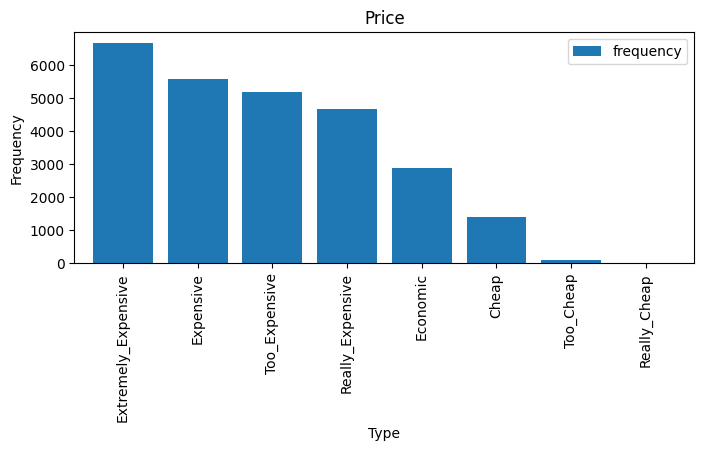

In [ ]:
filtro_index7.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Price')
plt.xlabel('Type')
plt.ylabel('Frequency')

In [ ]:
max8 = data['maximum_nights_avg_ntm'].max()
min8 = data['maximum_nights_avg_ntm'].min()
limites8 = [min8,max8]
limites8

[1.0, 1825.0]

In [ ]:
r8 = max8-min8
r8

ni8 = 1+3.32*np.log10(max8)
ni8

i8 = r8/ni8
i8

ni8

11.827392724391078

In [ ]:
intervalos8 = np.linspace(3.0,1125.0,11)
intervalos8

array([   3. ,  115.2,  227.4,  339.6,  451.8,  564. ,  676.2,  788.4,
        900.6, 1012.8, 1125. ])

In [ ]:
categorias8 = ['Extremely_Few','Really_Few','Too_Few','Small_Few','Few','Lots','Big_Lots','Many_Lots','Real_Lots','Extremely_Lots']

data1['maximum_nights_avg_ntm'] = pd.cut(x=data['maximum_nights_avg_ntm'], bins=intervalos8, labels=categorias8)
data1['maximum_nights_avg_ntm'].head(5)

0     Extremely_Few
1     Extremely_Few
2         Small_Few
3    Extremely_Lots
4     Extremely_Few
Name: maximum_nights_avg_ntm, dtype: category
Categories (10, object): ['Extremely_Few' < 'Really_Few' < 'Too_Few' < 'Small_Few' ... 'Big_Lots' <
                          'Many_Lots' < 'Real_Lots' < 'Extremely_Lots']

In [ ]:
data1['maximum_nights_avg_ntm'] = data1['maximum_nights_avg_ntm'].fillna(method='ffill')

<ipython-input-238-fd8f2d9f8e4d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['maximum_nights_avg_ntm'] = data1['maximum_nights_avg_ntm'].fillna(method='ffill')


In [ ]:
table8 = freq_tbl(data1['maximum_nights_avg_ntm'])
table8

maximum_nights_avg_ntm  frequency  percentage  cumulative_perc
0         Extremely_Lots      14997    0.565157         0.565157
1              Small_Few       7148    0.269370         0.834527
2          Extremely_Few       3115    0.117388         0.951914
3             Really_Few        517    0.019483         0.971397
4               Big_Lots        291    0.010966         0.982364
5              Real_Lots        167    0.006293         0.988657
6                    Few        107    0.004032         0.992689
7                   Lots         88    0.003316         0.996005
8                Too_Few         82    0.003090         0.999096
9              Many_Lots         24    0.000904         1.000000

In [ ]:
table8_2 = table8.drop(['percentage','cumulative_perc'],axis=1)

filtro8 = table8_2[table8_2['frequency']>0]

filtro_index8 = filtro8.set_index('maximum_nights_avg_ntm')
filtro_index8

frequency
maximum_nights_avg_ntm           
Extremely_Lots              14997
Small_Few                    7148
Extremely_Few                3115
Really_Few                    517
Big_Lots                      291
Real_Lots                     167
Few                           107
Lots                           88
Too_Few                        82
Many_Lots                      24

Text(0, 0.5, 'Frequency')

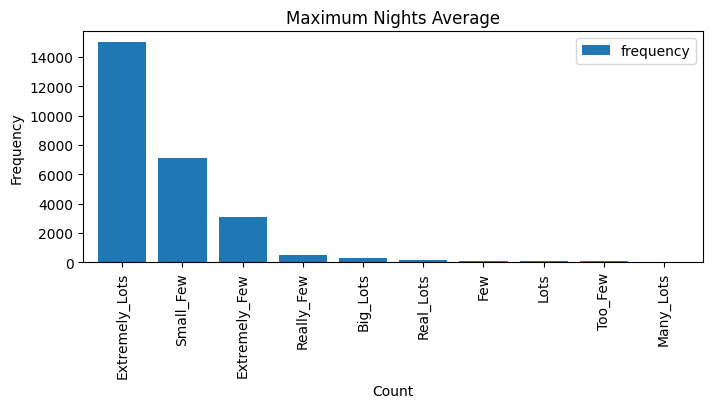

In [ ]:
filtro_index8.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Maximum Nights Average')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [ ]:
max9 = data['availability_365'].max()
min9 = data['availability_365'].min()
limites9 = [min9,max9]
limites9

[0, 365]

In [ ]:
r9 = max9-min9
r9

ni9 = 1+3.32*np.log10(max9)
ni9

i9 = r9/ni9
i9

ni9

9.506812309995496

In [ ]:
intervalos9 = np.linspace(0,365,9)
intervalos9

array([  0.   ,  45.625,  91.25 , 136.875, 182.5  , 228.125, 273.75 ,
       319.375, 365.   ])

In [ ]:
categorias9 = ['Extremely_Limited_Availability','Really_Limited_Availability','Too_Limited_Availability','Limited_Availability','Wide_Availability','Mostly_Wide_Availability','Really_Wide_Availability','Extremelly_Wide_Availability']

data1['availability_365'] = pd.cut(x=data['availability_365'], bins=intervalos9, labels=categorias9)
data1['availability_365'].head(5)

0        Mostly_Wide_Availability
1    Extremelly_Wide_Availability
2    Extremelly_Wide_Availability
3        Mostly_Wide_Availability
4    Extremelly_Wide_Availability
Name: availability_365, dtype: category
Categories (8, object): ['Extremely_Limited_Availability' < 'Really_Limited_Availability' <
                         'Too_Limited_Availability' < 'Limited_Availability' < 'Wide_Availability' <
                         'Mostly_Wide_Availability' < 'Really_Wide_Availability' <
                         'Extremelly_Wide_Availability']

In [ ]:
data1['availability_365'] = data1['availability_365'].fillna(method='ffill')

<ipython-input-246-677d2c13e0b1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['availability_365'] = data1['availability_365'].fillna(method='ffill')


In [ ]:
table9 = freq_tbl(data1['availability_365'])
table9

availability_365  frequency  percentage  cumulative_perc
0    Extremelly_Wide_Availability      10265    0.386833         0.386833
1        Mostly_Wide_Availability       3805    0.143390         0.530223
2            Limited_Availability       3659    0.137888         0.668111
3     Really_Limited_Availability       3131    0.117991         0.786102
4        Really_Wide_Availability       2099    0.079100         0.865202
5               Wide_Availability       1242    0.046804         0.912006
6  Extremely_Limited_Availability       1192    0.044920         0.956926
7        Too_Limited_Availability       1143    0.043074         1.000000

In [ ]:
table9_2 = table9.drop(['percentage','cumulative_perc'],axis=1)

filtro9 = table9_2[table9_2['frequency']>0]

filtro_index9 = filtro9.set_index('availability_365')
filtro_index9

frequency
availability_365                         
Extremelly_Wide_Availability        10265
Mostly_Wide_Availability             3805
Limited_Availability                 3659
Really_Limited_Availability          3131
Really_Wide_Availability             2099
Wide_Availability                    1242
Extremely_Limited_Availability       1192
Too_Limited_Availability             1143

Text(0, 0.5, 'Frequency')

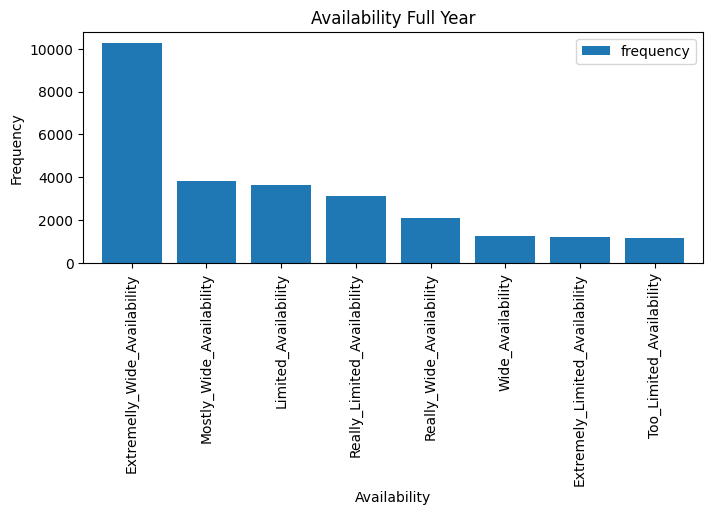

In [ ]:
filtro_index9.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Availability Full Year')
plt.xlabel('Availability')
plt.ylabel('Frequency')

In [ ]:
max10 = data['number_of_reviews'].max()
min10 = data['number_of_reviews'].min()
limites10 = [min10,max10]
limites10

[0.0, 128.0]

In [ ]:
r10 = max10-min10
r10

ni10 = 1+3.32*np.log10(max10)
ni10

i10 = r10/ni10
i10

ni10

7.995937099230923

In [ ]:
intervalos10 = np.linspace(0.0,113.0,8)
intervalos10

array([  0.        ,  16.14285714,  32.28571429,  48.42857143,
        64.57142857,  80.71428571,  96.85714286, 113.        ])

In [ ]:
categorias10 = ['Very_Few','Few','Little','Neutral','Some','Quite','A_Lot']

data1['number_of_reviews'] = pd.cut(x=data['number_of_reviews'], bins=intervalos10, labels=categorias10)
data1['number_of_reviews'].head(5)

0    Neutral
1        NaN
2    Neutral
3        Few
4    Neutral
Name: number_of_reviews, dtype: category
Categories (7, object): ['Very_Few' < 'Few' < 'Little' < 'Neutral' < 'Some' < 'Quite' < 'A_Lot']

In [ ]:
data1['number_of_reviews'] = data1['number_of_reviews'].fillna(method='ffill')

<ipython-input-254-9470787b3f66>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['number_of_reviews'] = data1['number_of_reviews'].fillna(method='ffill')


In [ ]:
table10 = freq_tbl(data1['number_of_reviews'])
table10

number_of_reviews  frequency  percentage  cumulative_perc
0          Very_Few      12239    0.461222         0.461222
1               Few       6906    0.260250         0.721473
2            Little       2531    0.095380         0.816853
3           Neutral       1835    0.069151         0.886004
4              Some       1258    0.047407         0.933411
5             Quite        980    0.036931         0.970342
6             A_Lot        787    0.029658         1.000000

In [ ]:
table10_2 = table10.drop(['percentage','cumulative_perc'],axis=1)

filtro10 = table10_2[table10_2['frequency']>0]

filtro_index10 = filtro10.set_index('number_of_reviews')
filtro_index10

frequency
number_of_reviews           
Very_Few               12239
Few                     6906
Little                  2531
Neutral                 1835
Some                    1258
Quite                    980
A_Lot                    787

Text(0, 0.5, 'Frequency')

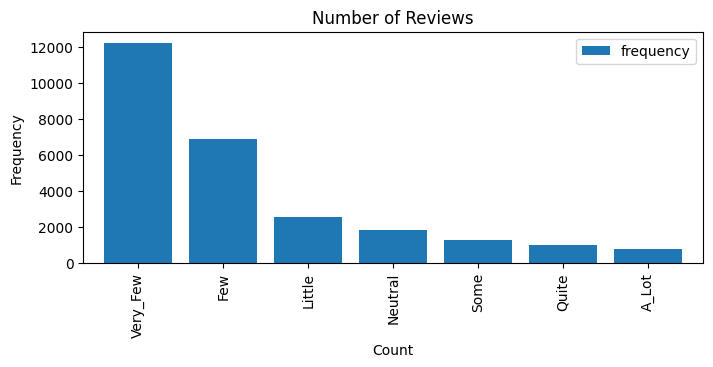

In [ ]:
filtro_index10.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Number of Reviews')
plt.xlabel('Count')
plt.ylabel('Frequency')

In [ ]:
max11 = data['review_scores_value'].max()
min11 = data['review_scores_value'].min()
limites11 = [min11,max11]
limites11

[4.4, 5.0]

In [ ]:
r11 = max11-min11
r11

ni11 = 1+3.32*np.log10(max11)
ni11

i11 = r11/ni11
i11

ni11

3.3205804143955824

In [ ]:
intervalos11 = np.linspace(4.19,5.0,3)
intervalos11

array([4.19 , 4.595, 5.   ])

In [ ]:
categorias11 = ['Bad','Great']

data1['review_scores_value'] = pd.cut(x=data['review_scores_value'], bins=intervalos11, labels=categorias11)
data1['review_scores_value'].head(5)

0    Great
1    Great
2      Bad
3    Great
4    Great
Name: review_scores_value, dtype: category
Categories (2, object): ['Bad' < 'Great']

In [ ]:
data1['review_scores_value'] = data1['review_scores_value'].fillna(method='ffill')

<ipython-input-262-34bac8a24481>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['review_scores_value'] = data1['review_scores_value'].fillna(method='ffill')


In [ ]:
table11 = freq_tbl(data1['review_scores_value'])
table11

review_scores_value  frequency  percentage  cumulative_perc
0               Great      24334    0.917018         0.917018
1                 Bad       2202    0.082982         1.000000

In [ ]:
table11_2 = table11.drop(['percentage','cumulative_perc'],axis=1)

filtro11 = table11_2[table11_2['frequency']>0]

filtro_index11 = filtro11.set_index('review_scores_value')
filtro_index11

frequency
review_scores_value           
Great                    24334
Bad                       2202

Text(0, 0.5, 'Frequency')

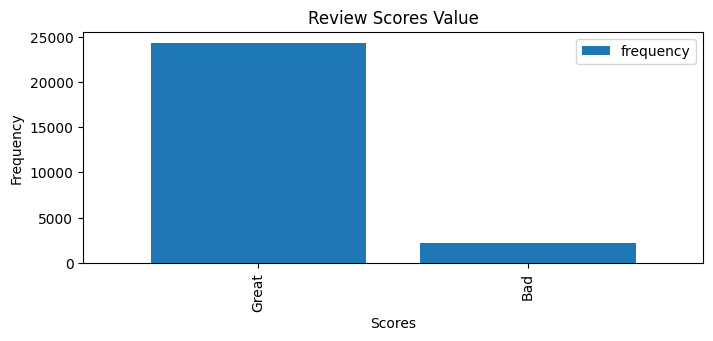

In [ ]:
filtro_index11.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Review Scores Value')
plt.xlabel('Scores')
plt.ylabel('Frequency')

In [ ]:
max12 = data['reviews_per_month'].max()
min12 = data['reviews_per_month'].min()
limites12 = [min12,max12]
limites12

[0.01, 4.57]

In [ ]:
r12 = max12-min12
r12

ni12 = 1+3.32*np.log10(max12)
ni12

i12 = r12/ni12
i12

ni12

3.190921784231903

In [ ]:
intervalos12 = np.linspace(0.01,4.37,3)
intervalos12

array([0.01, 2.19, 4.37])

In [ ]:
categorias12 = ['Few','Lots']

data1['reviews_per_month'] = pd.cut(x=data['reviews_per_month'], bins=intervalos12, labels=categorias12)
data1['reviews_per_month'].head(5)

0    Few
1    Few
2    Few
3    Few
4    Few
Name: reviews_per_month, dtype: category
Categories (2, object): ['Few' < 'Lots']

In [ ]:
data1['reviews_per_month'] = data1['reviews_per_month'].fillna(method='ffill')

<ipython-input-270-981b1b28de52>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['reviews_per_month'] = data1['reviews_per_month'].fillna(method='ffill')


In [ ]:
table12 = freq_tbl(data1['reviews_per_month'])
table12

reviews_per_month  frequency  percentage  cumulative_perc
0               Few      21711    0.818172         0.818172
1              Lots       4825    0.181828         1.000000

In [ ]:
table12_2 = table12.drop(['percentage','cumulative_perc'],axis=1)

filtro12 = table12_2[table12_2['frequency']>0]

filtro_index12 = filtro12.set_index('reviews_per_month')
filtro_index12

frequency
reviews_per_month           
Few                    21711
Lots                    4825

Text(0, 0.5, 'Frequency')

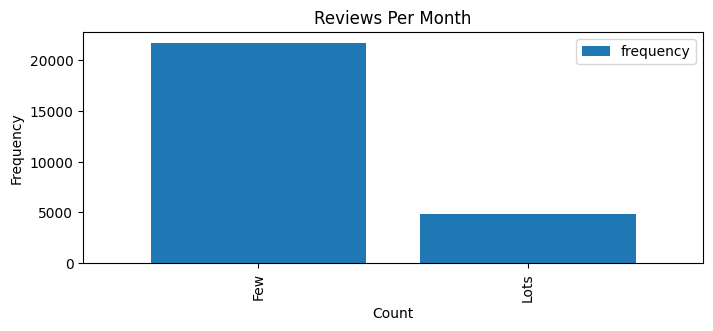

In [ ]:
filtro_index12.plot(kind='bar', width=0.8, figsize=(8,3))
plt.title('Reviews Per Month')
plt.xlabel('Count')
plt.ylabel('Frequency')